# Global Power Plant Database

# Problem Statement:

* Description

* The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes   power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.

* Key attributes of the database
* The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]
`country_long` (text): longer form of the country designation
`name` (text): name or title of the power plant, generally in Romanized form
`gppd_idnr` (text): 10 or 12 character identifier for the power plant
`capacity_mw` (number): electrical generating capacity in megawatts
`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)
`primary_fuel` (text): energy source used in primary electricity generation or export
`other_fuel1` (text): energy source used in electricity generation or export
`other_fuel2` (text): energy source used in electricity generation or export
`other_fuel3` (text): energy source used in electricity generation or export
 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is available
`owner` (text): majority shareholder of the power plant, generally in Romanized form
`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form
`url` (text): web document corresponding to the `source` field
`geolocation_source` (text): attribution for geolocation information
`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.
`year_of_capacity_data` (number): year the capacity information was reported
`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013
`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014
`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015
`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016
`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017
`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018
`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019
`generation_data_source` (text): attribution for the reported generation information
`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013
`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 
`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 
`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 
'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013
`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 
`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015
`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016
`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

* Fuel Type Aggregation

* We define the "Fuel Type" attribute of our database based on common fuel categories. 

# Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

# Importing Required Libraries

In [234]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.feature_selection import SelectKBest,f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, roc_auc_score,recall_score,precision_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score,KFold,StratifiedShuffleSplit,StratifiedKFold
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import pickle
import warnings
warnings.filterwarnings('ignore')

In [235]:
df =pd.read_csv("database_IND.csv")

In [236]:
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [237]:
#Record view
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [238]:
#statistical view of my dataset
df.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


**The count is not tally for other features also**

In [239]:
for i in df.columns:
    print("======================================================")
    print("Value counts of", i, "\n" )
    print(df[i].value_counts())
    print('======================================================')

Value counts of country 

IND    907
Name: country, dtype: int64
Value counts of country_long 

India    907
Name: country_long, dtype: int64
Value counts of name 

ACME Solar Tower           1
RAICHUR                    1
PRYAGRAJ (BARA) TPP        1
PULICHINTALA               1
PUNE MILL                  1
                          ..
KADANA                     1
KADRA                      1
KAHALGAON                  1
KAIGA                      1
iEnergy Theni Wind Farm    1
Name: name, Length: 907, dtype: int64
Value counts of gppd_idnr 

WRI1020239    1
IND0000356    1
IND0000346    1
IND0000523    1
WRI1019978    1
             ..
IND0000167    1
IND0000168    1
IND0000169    1
IND0000170    1
WRI1026761    1
Name: gppd_idnr, Length: 907, dtype: int64
Value counts of capacity_mw 

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64
Value counts 

In [240]:
df.dtypes

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_gwh_2018         float64
generation_gwh_2019         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

# Categorical column:-
**country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,owner,generation_data_source**

# numerical column:
**capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh,**

**Count of unique value in each column**

In [241]:
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

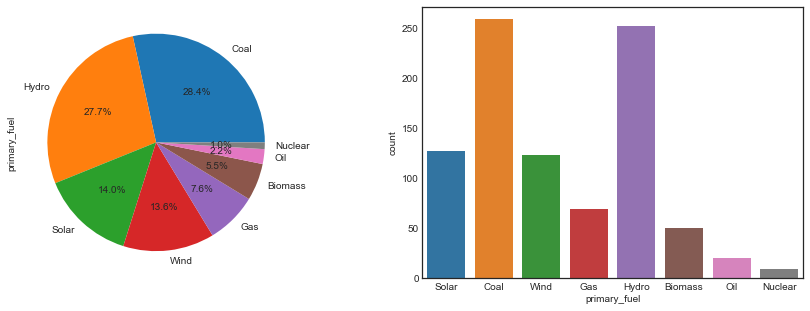

In [242]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['primary_fuel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['primary_fuel'])
df['primary_fuel'].value_counts()

WRI                                     765
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64

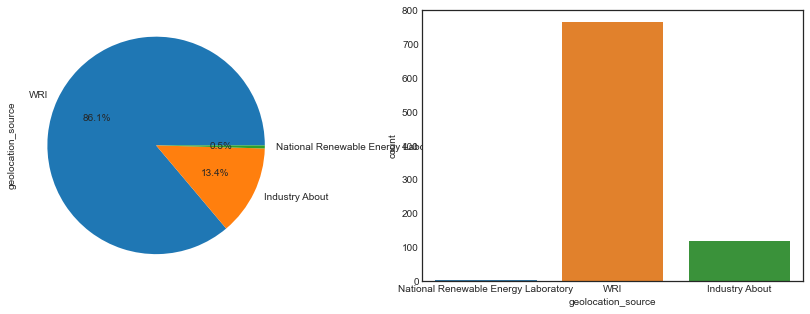

In [243]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
df['geolocation_source'].value_counts().plot.pie(autopct='%1.1f%%')
plt.subplot(1,2,2)
sns.countplot(df['geolocation_source'])
df['geolocation_source'].value_counts()

In [244]:
#info of my columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [245]:
#find duplicates
df.duplicated().sum()

0

**there are no duplicates present in the dataset**

In [246]:
#null value check
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

**There are null values present in many columns of the dataset**


**The features which have null value for all the rows shall be dropped**


**let us first describe the entire list of features and their details**


**we shall treat null values once we evaluate the value counts of each feature**

<AxesSubplot:>

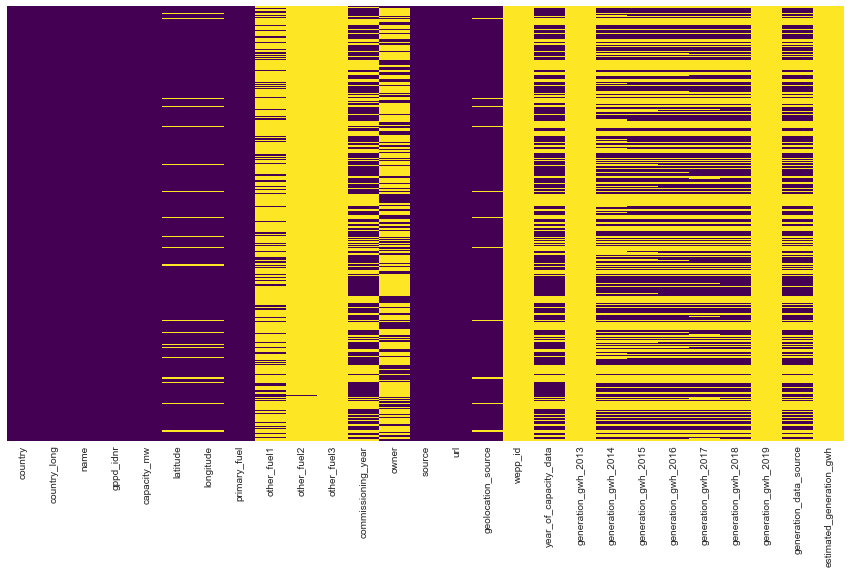

In [247]:
plt.figure(figsize=(15,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**Country (identifier) : all the entries are the same IND; we will drop the column**

**Country_long (identifier) : all the entries are the same India; we will drop this column as well**

**name (identifier) : this is just an identifier, we will drop this column as well**

**gppd_idnr (identifier) : this is just an identifier, we will drop this column as well**

**owner (owner will not add value in prediction) : the owner of the powerplant will not add any value in the prediction, we will drop this column**

**source (source will not add value in prediction) : this feature describes the entity who has reported the data, it has nothing to do with the prediction of the target column. Hence, we shall drop this column as well**

**url (url will not add any value in prediction) : this feature describes the url of the source who reported the data, it has nothing to do with the prediction of the target column. Hence, we shall drop this column as well**

**year_of_capacity_data (388 null entries) : all the non null entries were reported in the year 2019. we can drop this column, as this will not make any difference in the prediction**

**generation_data_source (458 null entries) : Central Electricity Authority has reported the above information for all non-null entries. we can drop this column, as this will not make any difference in the prediction**

**geolocation_source (19 null entries) : Because this feature describe the source of information for the geolocation for all non-null entries. we can drop this column, as this will not make any difference in the prediction**

**The below mentioned columns are almost filled with null values:-
other fuel2, other fuel3,wepp_id and estimated_generation_gwhh we can drop it**

**The Below columns will be deleted as it has Around 50% of null values**

**We will drop other fuels columns also, as they have many missing values and will not impact on generation**

In [248]:
#shape of mydataset
df.shape

(907, 27)

In [249]:
#Treating Null values

df['latitude'] = df['latitude'].fillna(df['latitude'].mean())

In [250]:
df['longitude'] = df['longitude'].fillna(df['longitude'].mean())

df['commissioning_year'] = df['commissioning_year'].fillna(df['commissioning_year'].mean())

df['geolocation_source'] = df['geolocation_source'].fillna('National Renewable Energy Laboratory')

In [251]:
#Dropping columns which have more than 50% of null values
df = df.drop(['other_fuel1','other_fuel2','other_fuel3','owner','wepp_id','year_of_capacity_data',
             'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015','generation_gwh_2016', 
             'generation_gwh_2017', 'generation_gwh_2018',
             'generation_gwh_2019', 'generation_data_source','estimated_generation_gwh'],axis=1)

In [252]:
#Updated df
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.000000,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,1997.091082,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,1997.091082,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.000000,Central Electricity Authority,http://www.cea.nic.in/,WRI
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.000000,Central Electricity Authority,http://www.cea.nic.in/,WRI


In [253]:
#Dropping columns which are not relevant to our model
df = df.drop(['country', 'country_long', 'name', 'gppd_idnr','url'],axis=1)

In [254]:
df.shape

(907, 7)

In [255]:
#Again checking for missing values

df.isnull().sum()

capacity_mw           0
latitude              0
longitude             0
primary_fuel          0
commissioning_year    0
source                0
geolocation_source    0
dtype: int64

<AxesSubplot:>

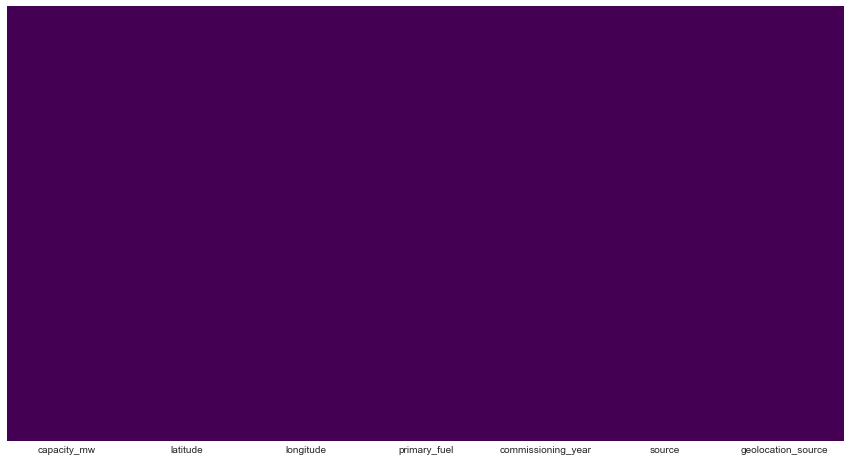

In [256]:
plt.figure(figsize=(15,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [257]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year
count,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.464907,1997.091082
std,590.085456,6.079148,4.812291,13.016360
min,0.000000,8.168900,68.644700,1927.000000
25%,16.725000,17.072000,74.388900,1997.091082
50%,59.200000,21.281800,76.979200,1997.091082
75%,385.250000,25.176450,79.206100,2003.000000
max,4760.000000,34.649000,95.408000,2018.000000


In [258]:
df.describe(include='all')

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
count,907.000000,907.000000,907.000000,907,907.000000,907,907
unique,NaN,NaN,NaN,8,NaN,191,3
top,NaN,NaN,NaN,Coal,NaN,Central Electricity Authority,WRI
freq,NaN,NaN,NaN,258,NaN,519,765
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,NaN
std,590.085456,6.079148,4.812291,NaN,13.016360,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,NaN
25%,16.725000,17.072000,74.388900,NaN,1997.091082,NaN,NaN
50%,59.200000,21.281800,76.979200,NaN,1997.091082,NaN,NaN
75%,385.250000,25.176450,79.206100,NaN,2003.000000,NaN,NaN


<AxesSubplot:>

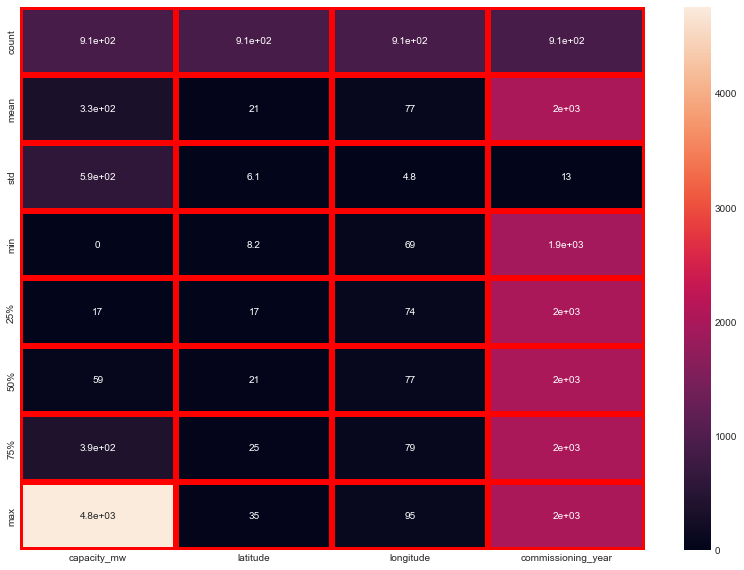

In [259]:
plt.figure(figsize=(14,10))
sns.heatmap(df.describe(),annot=True,linecolor='Red',linewidths=6)

# Univariate Analysis

In [260]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.000000,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,1997.091082,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,1997.091082,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.000000,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.000000,Central Electricity Authority,WRI


In [261]:
df.dtypes

capacity_mw           float64
latitude              float64
longitude             float64
primary_fuel           object
commissioning_year    float64
source                 object
geolocation_source     object
dtype: object

**Exploring Numerical Variables**

In [262]:
numerical_variables = df.select_dtypes(include=['float64'])
numerical_variables

,capacity_mw,latitude,longitude,commissioning_year
0,2.5,28.1839,73.2407,2011.000000
1,98.0,24.7663,74.6090,1997.091082
2,39.2,21.9038,69.3732,1997.091082
3,135.0,23.8712,91.3602,2004.000000
4,1800.0,21.9603,82.4091,2015.000000
...,...,...,...,...
902,1600.0,16.2949,77.3568,2016.000000
903,3.0,12.8932,78.1654,1997.091082
904,25.5,15.2758,75.5811,1997.091082
905,80.0,24.3500,73.7477,1997.091082


# EDA

**Dist Plot**

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

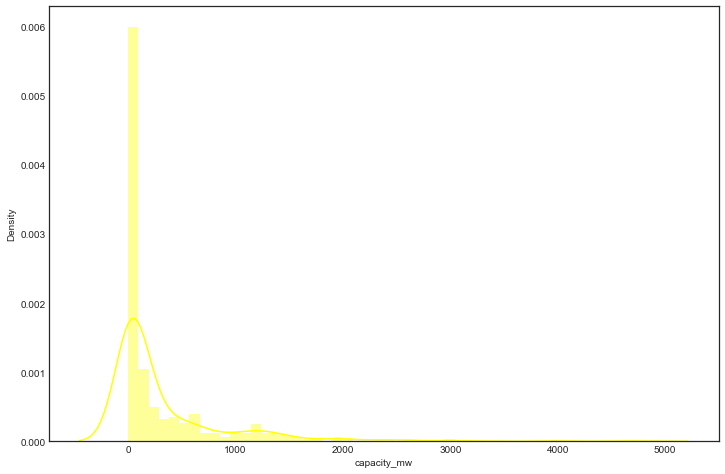

In [263]:
plt.figure(figsize=(12,8))
sns.distplot(numerical_variables['capacity_mw'],color='yellow')

<AxesSubplot:xlabel='latitude', ylabel='Density'>

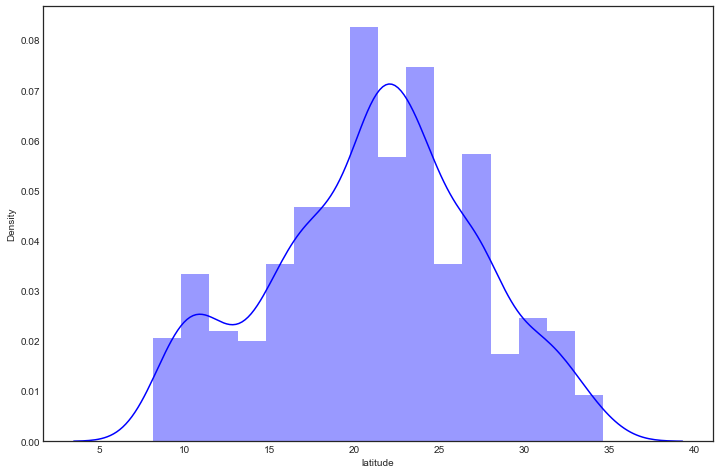

In [264]:
plt.figure(figsize=(12,8))
sns.distplot(numerical_variables['latitude'],color='blue')

<AxesSubplot:xlabel='longitude', ylabel='Density'>

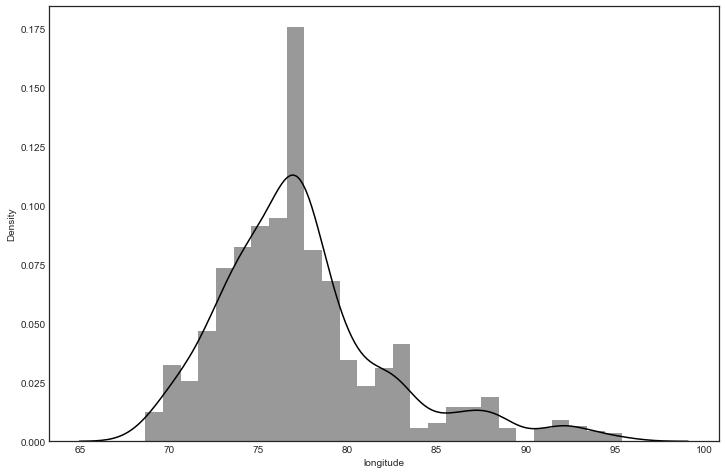

In [265]:
plt.figure(figsize=(12,8))
sns.distplot(numerical_variables['longitude'],color='black')

<AxesSubplot:xlabel='commissioning_year', ylabel='Density'>

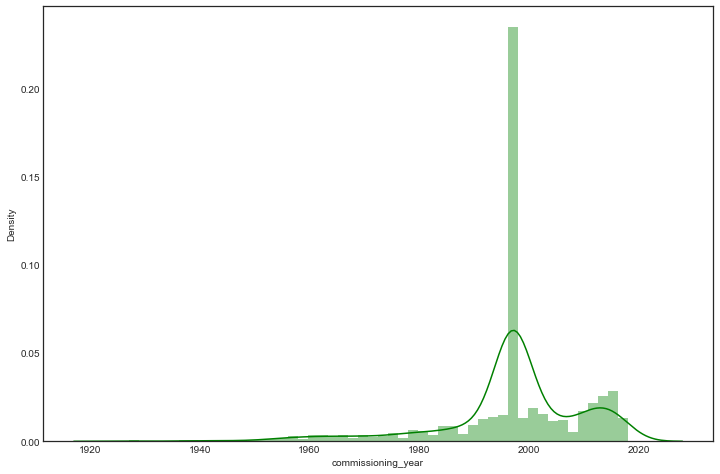

In [266]:
plt.figure(figsize=(12,8))
sns.distplot(numerical_variables['commissioning_year'],color='green')

<AxesSubplot:xlabel='latitude'>

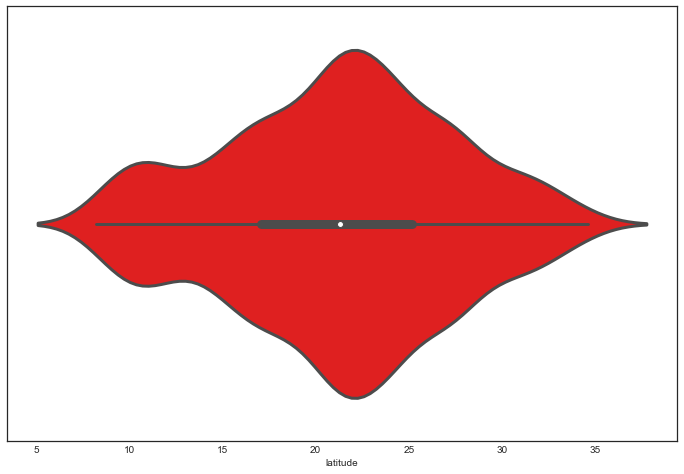

In [267]:
#latitude
plt.figure(figsize=(12,8))
sns.violinplot(numerical_variables['latitude'],color='red',edgecolor='black',linewidth=3)

<AxesSubplot:xlabel='longitude'>

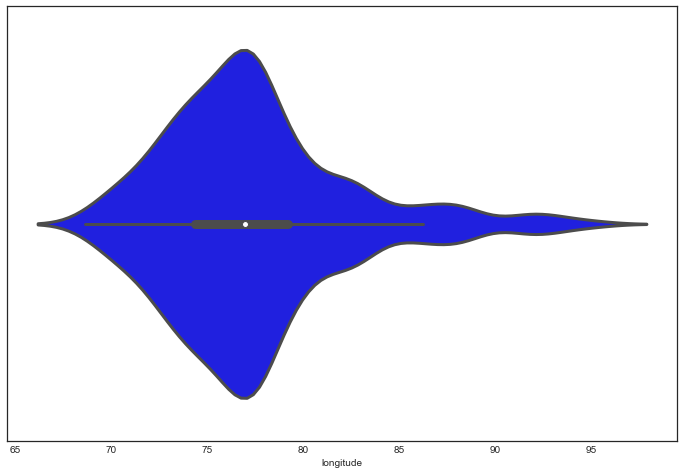

In [268]:
#longitude
plt.figure(figsize=(12,8))
sns.violinplot(numerical_variables['longitude'],color='blue',edgecolor='black',linewidth=3)

<AxesSubplot:xlabel='capacity_mw'>

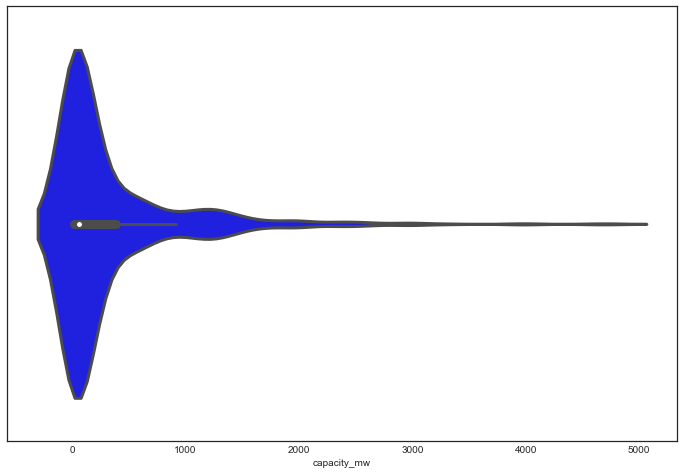

In [269]:
#capacity_mw
plt.figure(figsize=(12,8))
sns.violinplot(numerical_variables['capacity_mw'],color='blue',edgecolor='black',linewidth=3)

<AxesSubplot:xlabel='commissioning_year'>

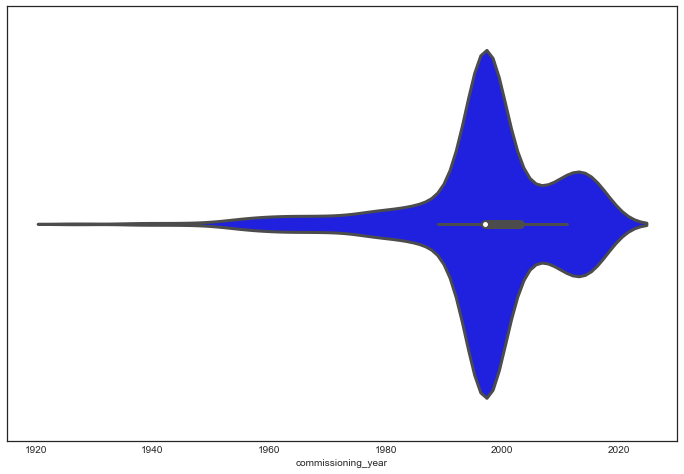

In [270]:
#commissioning_year
plt.figure(figsize=(12,8))
sns.violinplot(numerical_variables['commissioning_year'],color='blue',edgecolor='black',linewidth=3)

**Histogram**

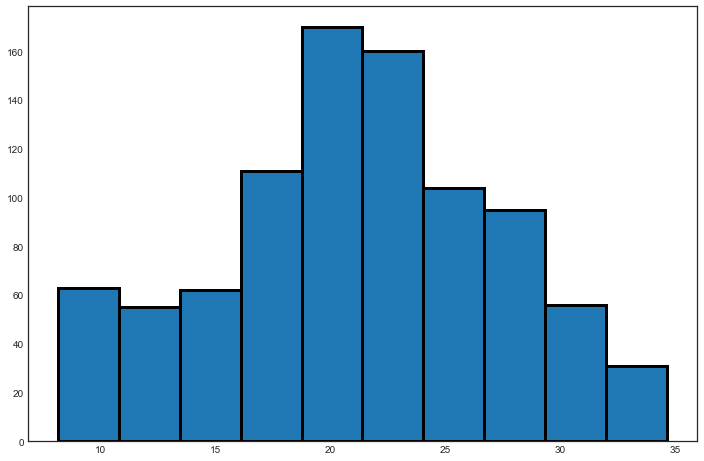

In [271]:
#Latitude
plt.figure(figsize=(12,8))
plt.hist(numerical_variables['latitude'],edgecolor='black',linewidth=3)
plt.show()

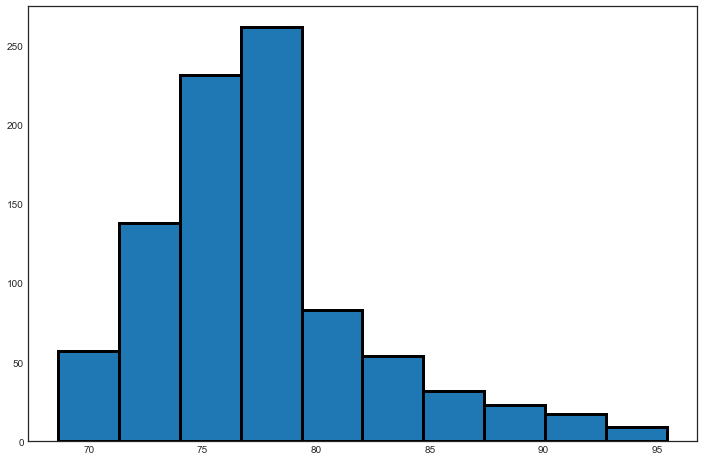

In [272]:
#Longitude
plt.figure(figsize=(12,8))
plt.hist(numerical_variables['longitude'],edgecolor='black',linewidth=3)
plt.show()


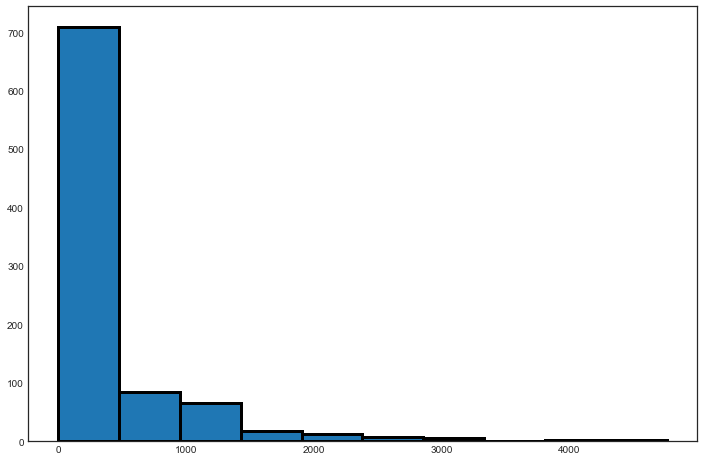

In [273]:
#Capacity_mw
plt.figure(figsize=(12,8))
plt.hist(numerical_variables['capacity_mw'],edgecolor='black',linewidth=3)
plt.show()

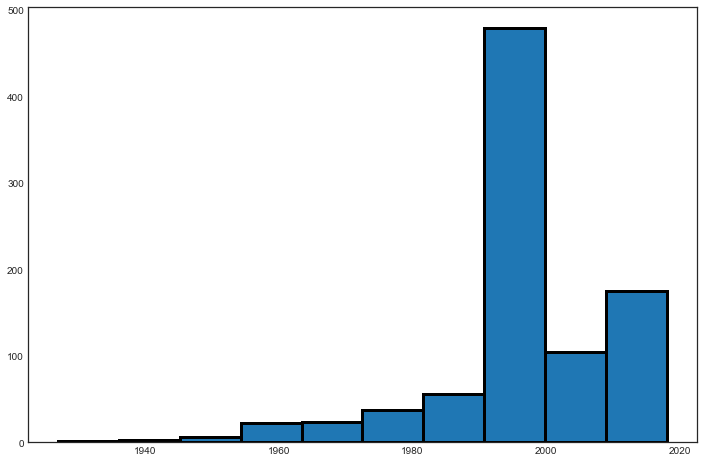

In [274]:
#commissioning_year
plt.figure(figsize=(12,8))
plt.hist(numerical_variables['commissioning_year'],edgecolor='black',linewidth=3)
plt.show()


**Exploring Categorical Variables**

In [275]:
c_var = df.select_dtypes(include=['O'])
c_var

,primary_fuel,source,geolocation_source
0,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,Coal,Ultratech Cement ltd,WRI
2,Wind,CDM,WRI
3,Gas,Central Electricity Authority,WRI
4,Coal,Central Electricity Authority,WRI
...,...,...,...
902,Coal,Central Electricity Authority,WRI
903,Solar,Karnataka Power Corporation Limited,Industry About
904,Wind,CDM,WRI
905,Coal,Hindustan Zinc ltd,WRI


In [276]:
for col in c_var:
    c=df[col].value_counts()
    print(c)
    print('-'*100)

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64
----------------------------------------------------------------------------------------------------
Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: sou

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

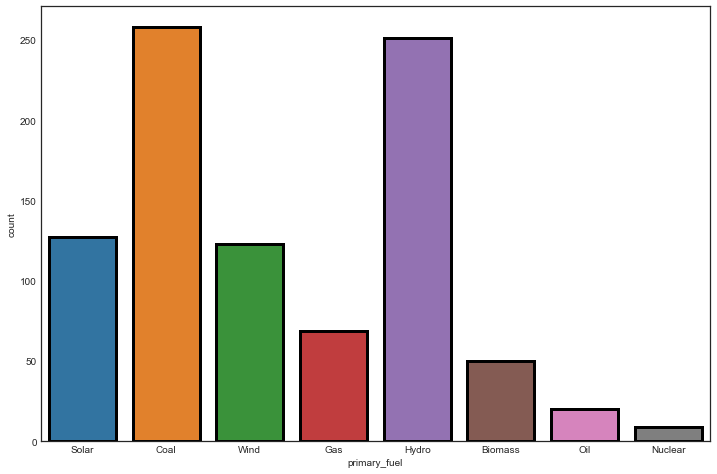

In [277]:
#Primary_fuel
plt.figure(figsize=(12,8))
sns.countplot(c_var['primary_fuel'],edgecolor='black',linewidth=3)

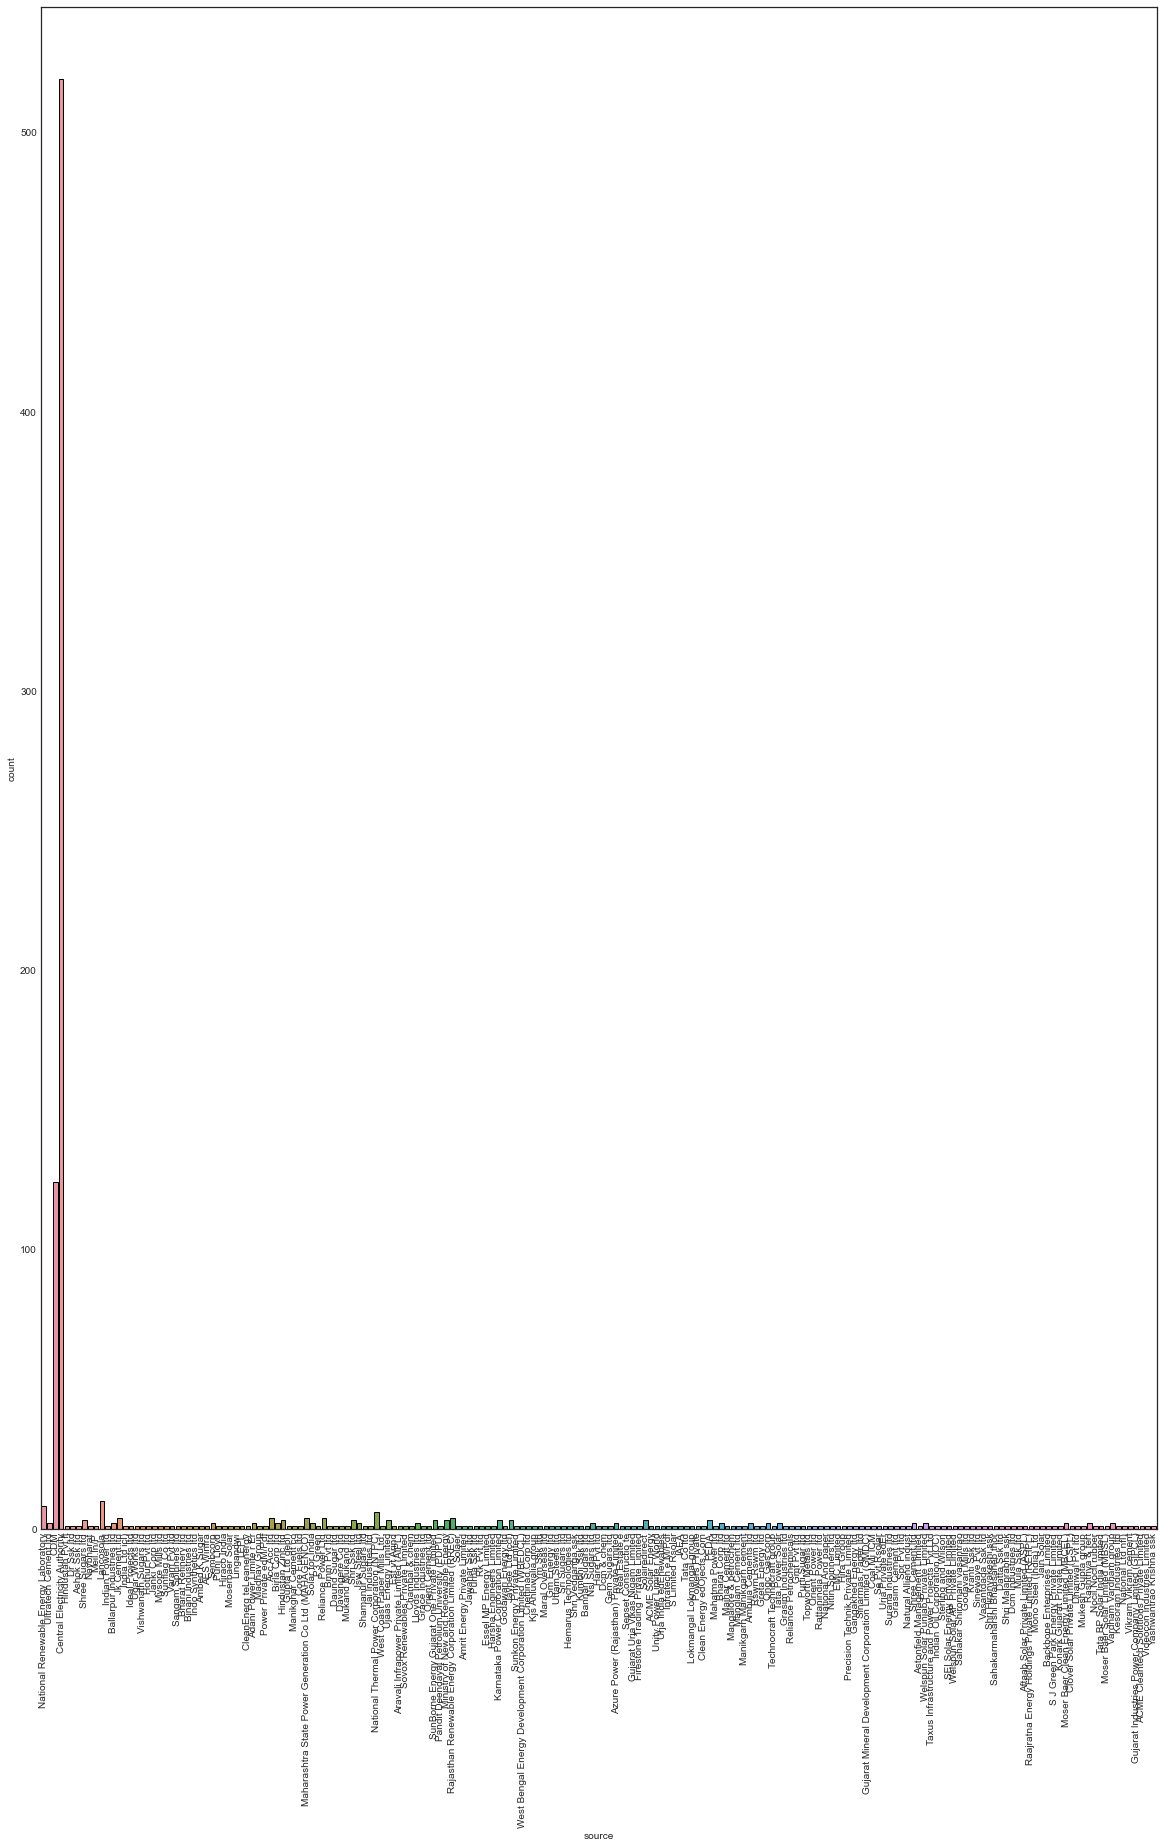

In [278]:
#Source
plt.figure(figsize=(20,28))
sns.countplot(c_var['source'],edgecolor='black',linewidth=1)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

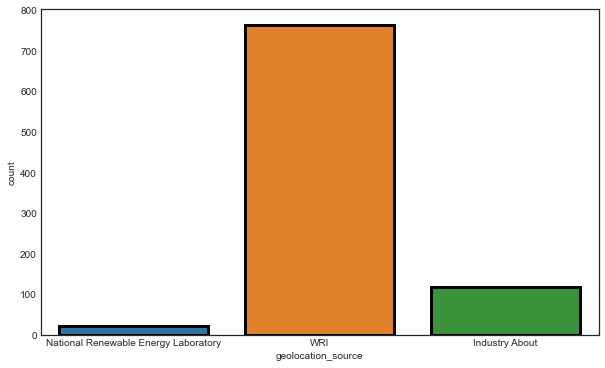

In [279]:
#Geolocation_source
plt.figure(figsize=(10,6))
sns.countplot(c_var['geolocation_source'],edgecolor='black',linewidth=3)

# Bivariate Analysis

**Our target variable is Primary Fuel i.e its a multiclassfication problem.I will compare feature variables with the target to check the distribution of the data**

**SCATTER PLOT**

In [280]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.000000,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,1997.091082,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,1997.091082,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.000000,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.000000,Central Electricity Authority,WRI


In [281]:
#dividing the columns in feature and label
X = df.drop(columns=['primary_fuel'])
y = df['primary_fuel']

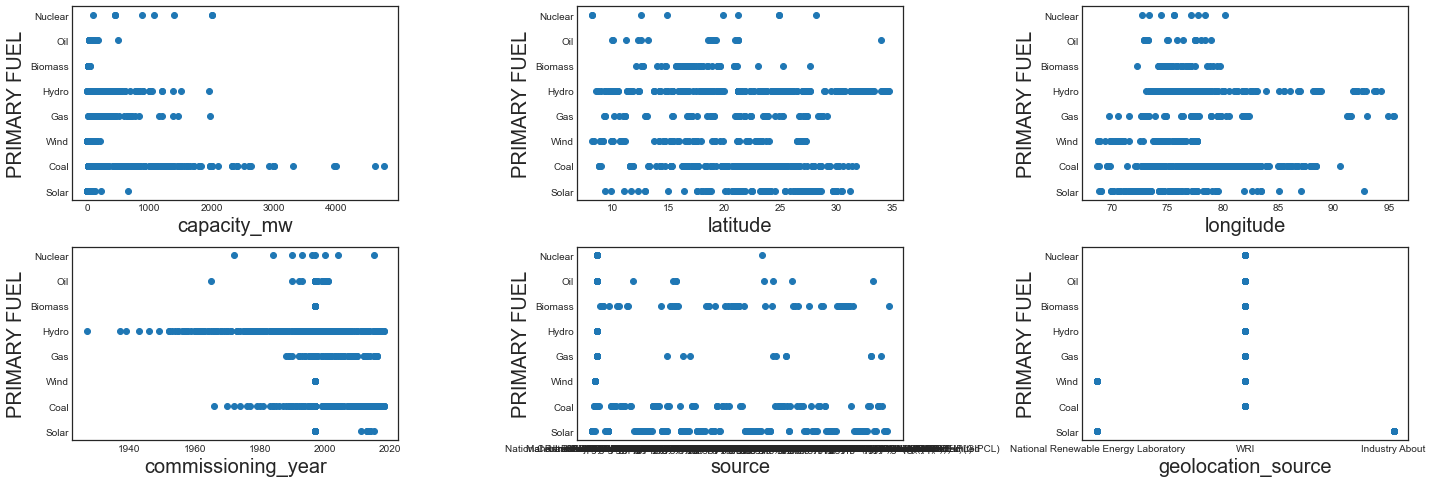

In [282]:
#Visualizing relatinship between feature and label (SCATTER PLOT)

plt.figure(figsize=(20,33),facecolor='white')
plotnumber=1

for column in X:
    if plotnumber<=30: 
        ax=plt.subplot(10,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('PRIMARY FUEL', fontsize=20)
        plotnumber+=1
plt.tight_layout()

**BAR PLOT**

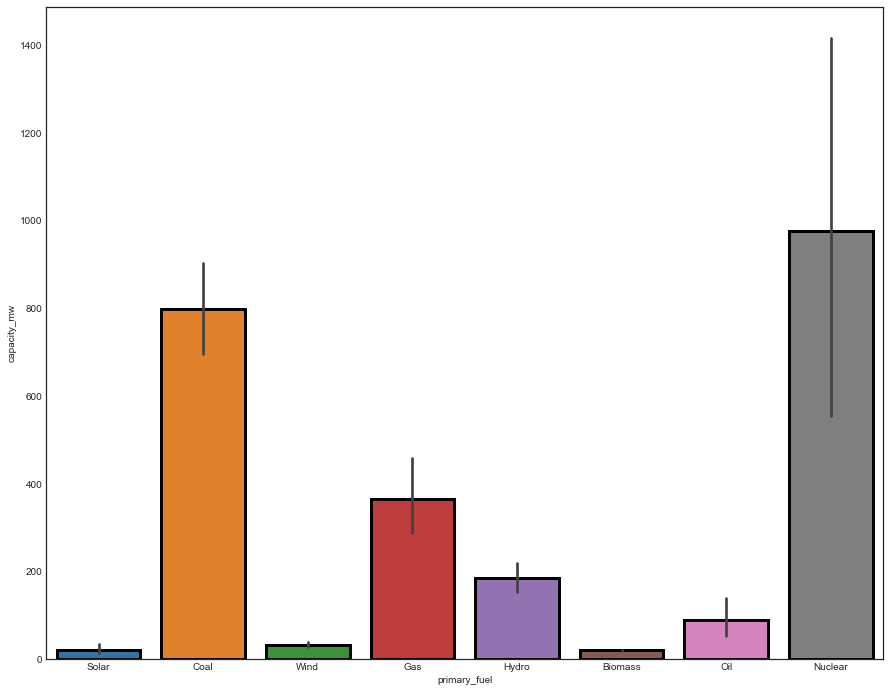

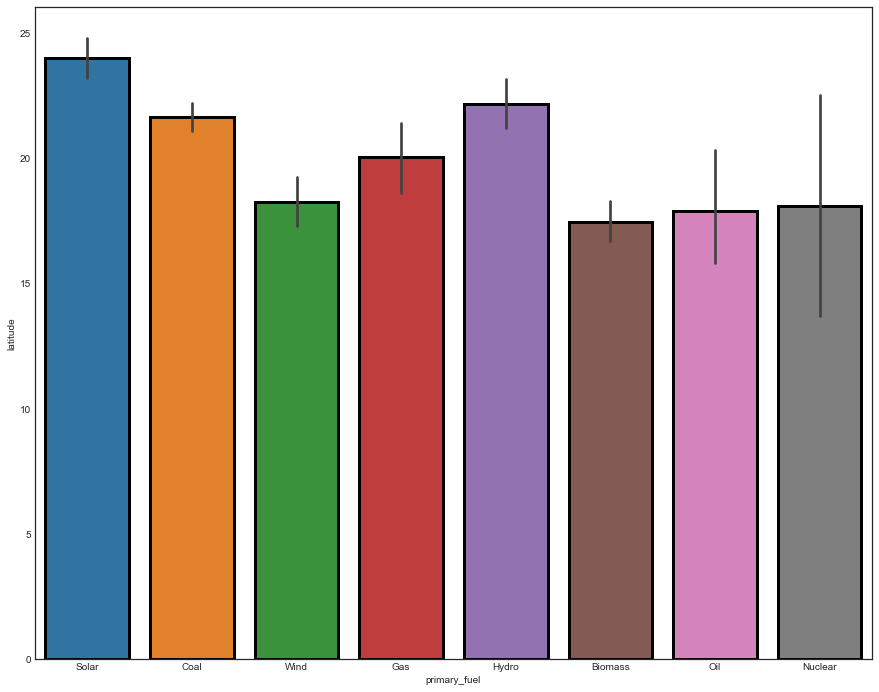

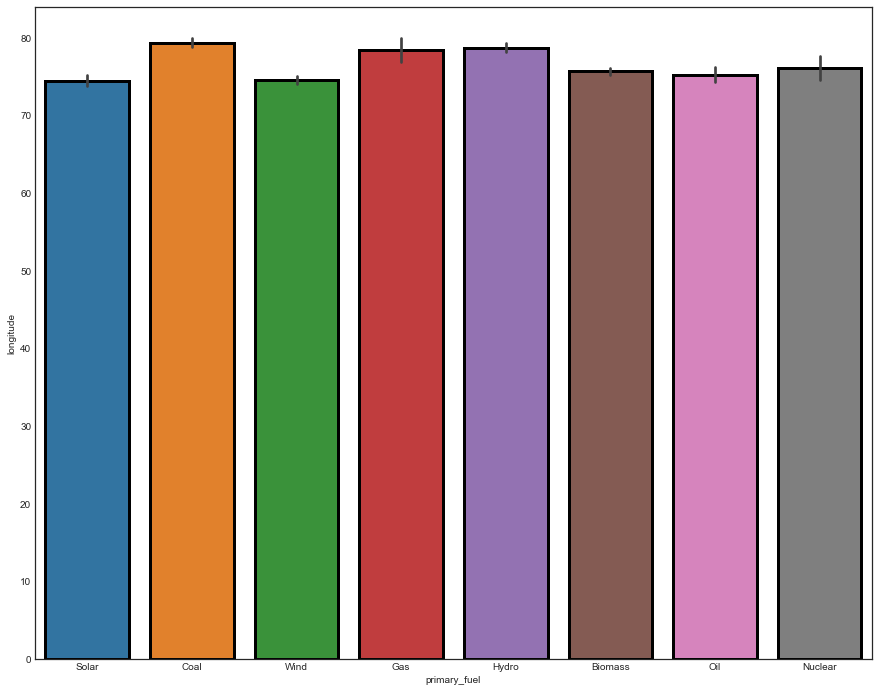

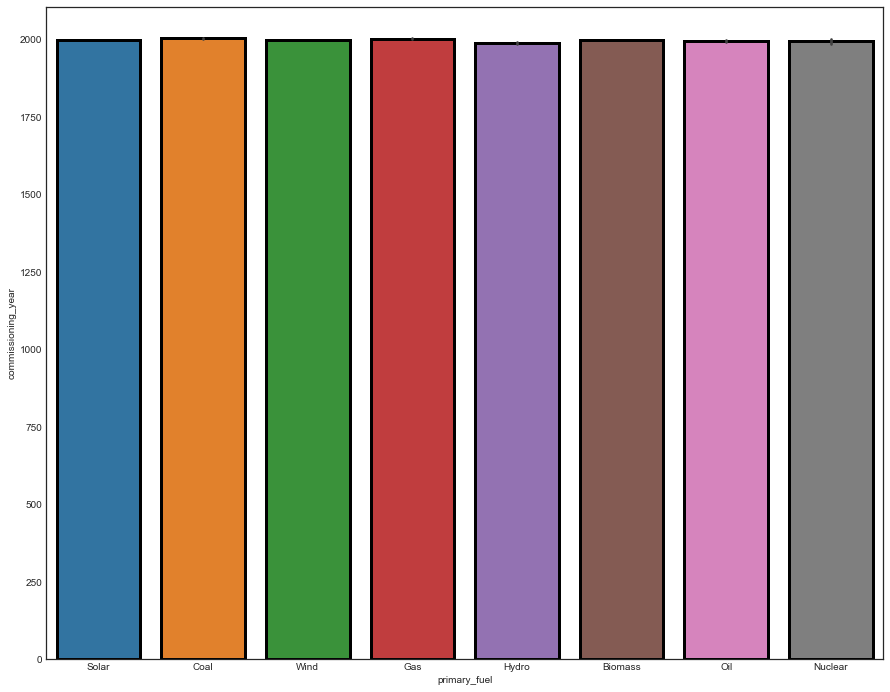

In [283]:
#BAR PLOT

for i in numerical_variables:
    plt.figure(figsize=(15,12))
    sns.barplot(df['primary_fuel'],df[i],edgecolor='black',linewidth=3)

**LINE PLOT**

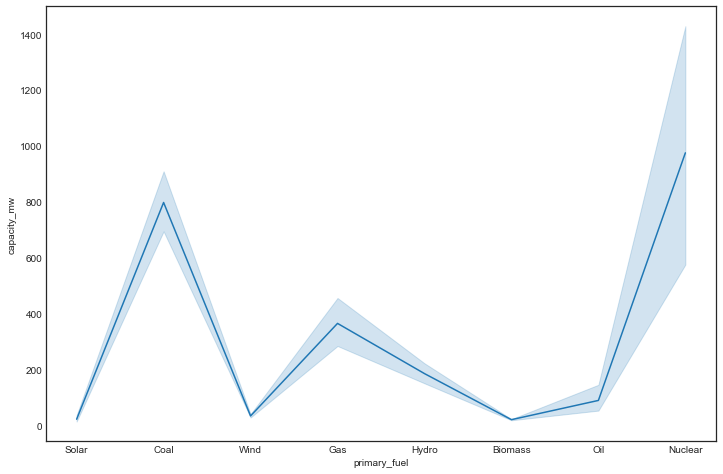

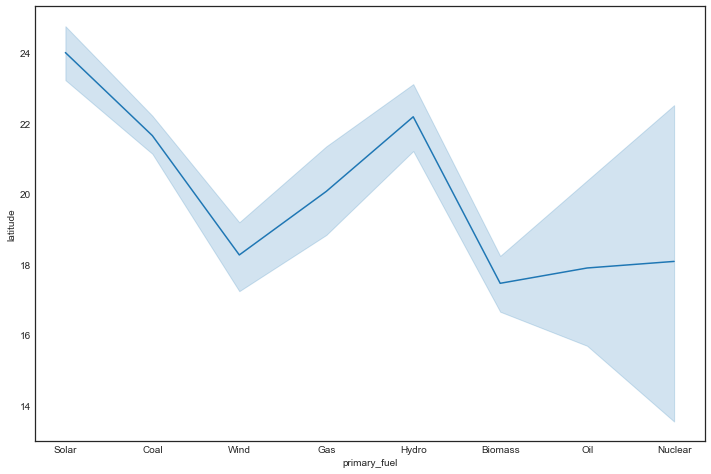

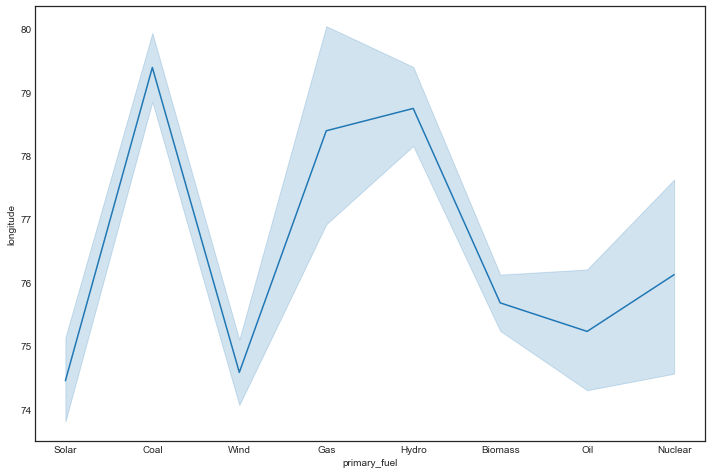

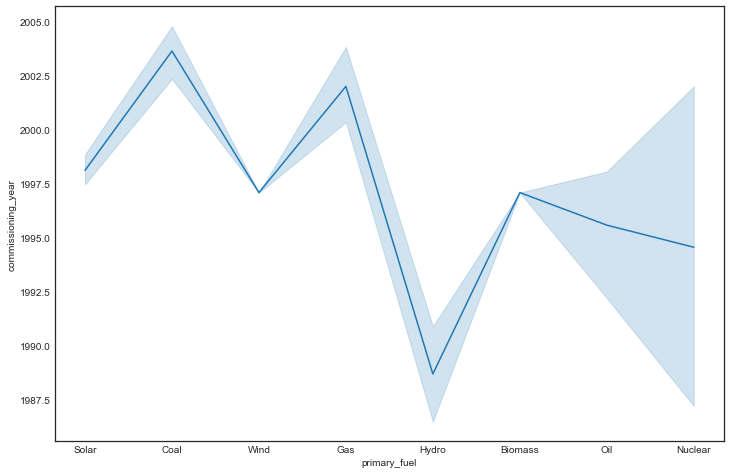

In [284]:
for i in numerical_variables:
    plt.figure(figsize=(12,8))
    sns.lineplot(df['primary_fuel'],df[i])

# OBSERVATIONS - FEATURE DISTRIBUTION








# Check for skewness

In [285]:
df.skew().sort_values(ascending=False)

capacity_mw           3.123576
longitude             1.141881
latitude             -0.149698
commissioning_year   -1.399359
dtype: float64

**There is SKEW present need to be remove so lets check first outliers**

# Checking for outliers

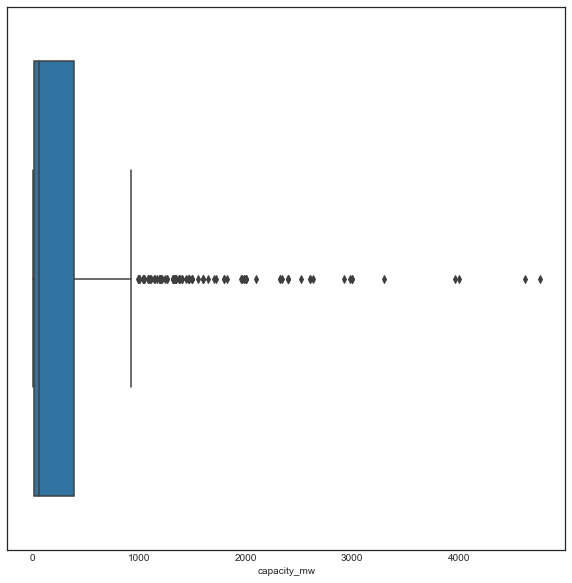

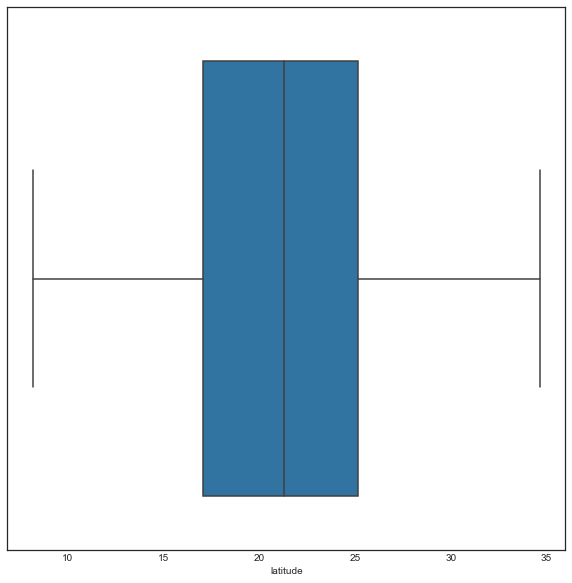

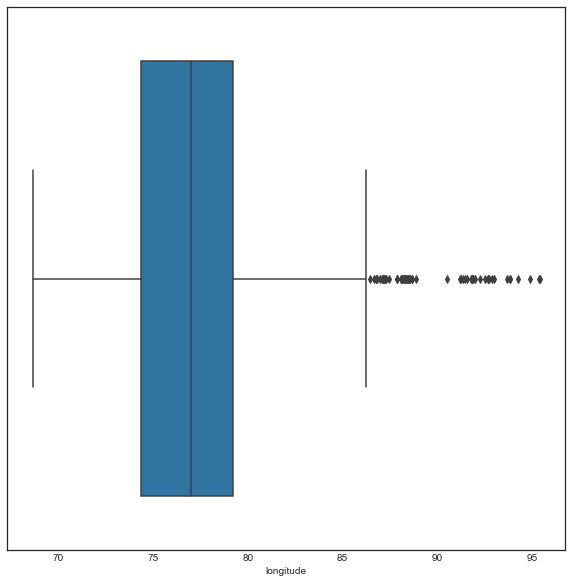

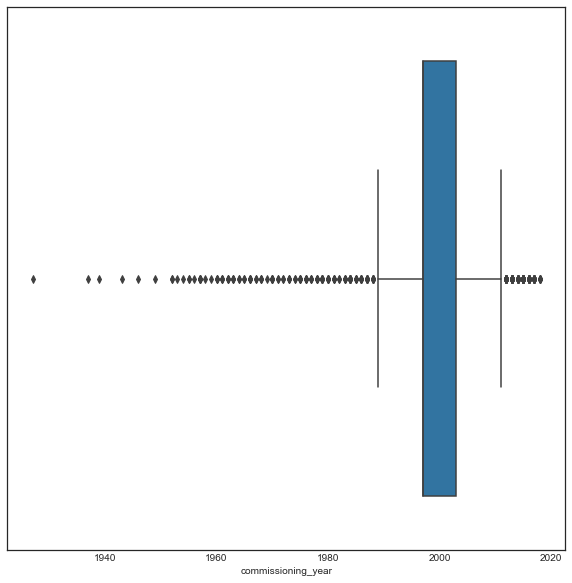

In [286]:
#Outlier Detection

for i in numerical_variables:
    plt.figure(figsize=(10,10))
    sns.boxplot(df[i])


**I will use Z score to treat outliers in the further stages**

# Encoding 

# Converting Numerical Variable to Categorical Variable

In [287]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [288]:
c_var.head()

,primary_fuel,source,geolocation_source
0,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,Coal,Ultratech Cement ltd,WRI
2,Wind,CDM,WRI
3,Gas,Central Electricity Authority,WRI
4,Coal,Central Electricity Authority,WRI


In [289]:
c_var.columns

Index(['primary_fuel', 'source', 'geolocation_source'], dtype='object')

In [290]:
#Encdoing Code

for feature in c_var:
    df[feature] = le.fit_transform(df[feature])
    df[feature]

In [291]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.000000,109,1
1,98.0,24.7663,74.6090,1,1997.091082,174,2
2,39.2,21.9038,69.3732,7,1997.091082,21,2
3,135.0,23.8712,91.3602,2,2004.000000,22,2
4,1800.0,21.9603,82.4091,1,2015.000000,22,2


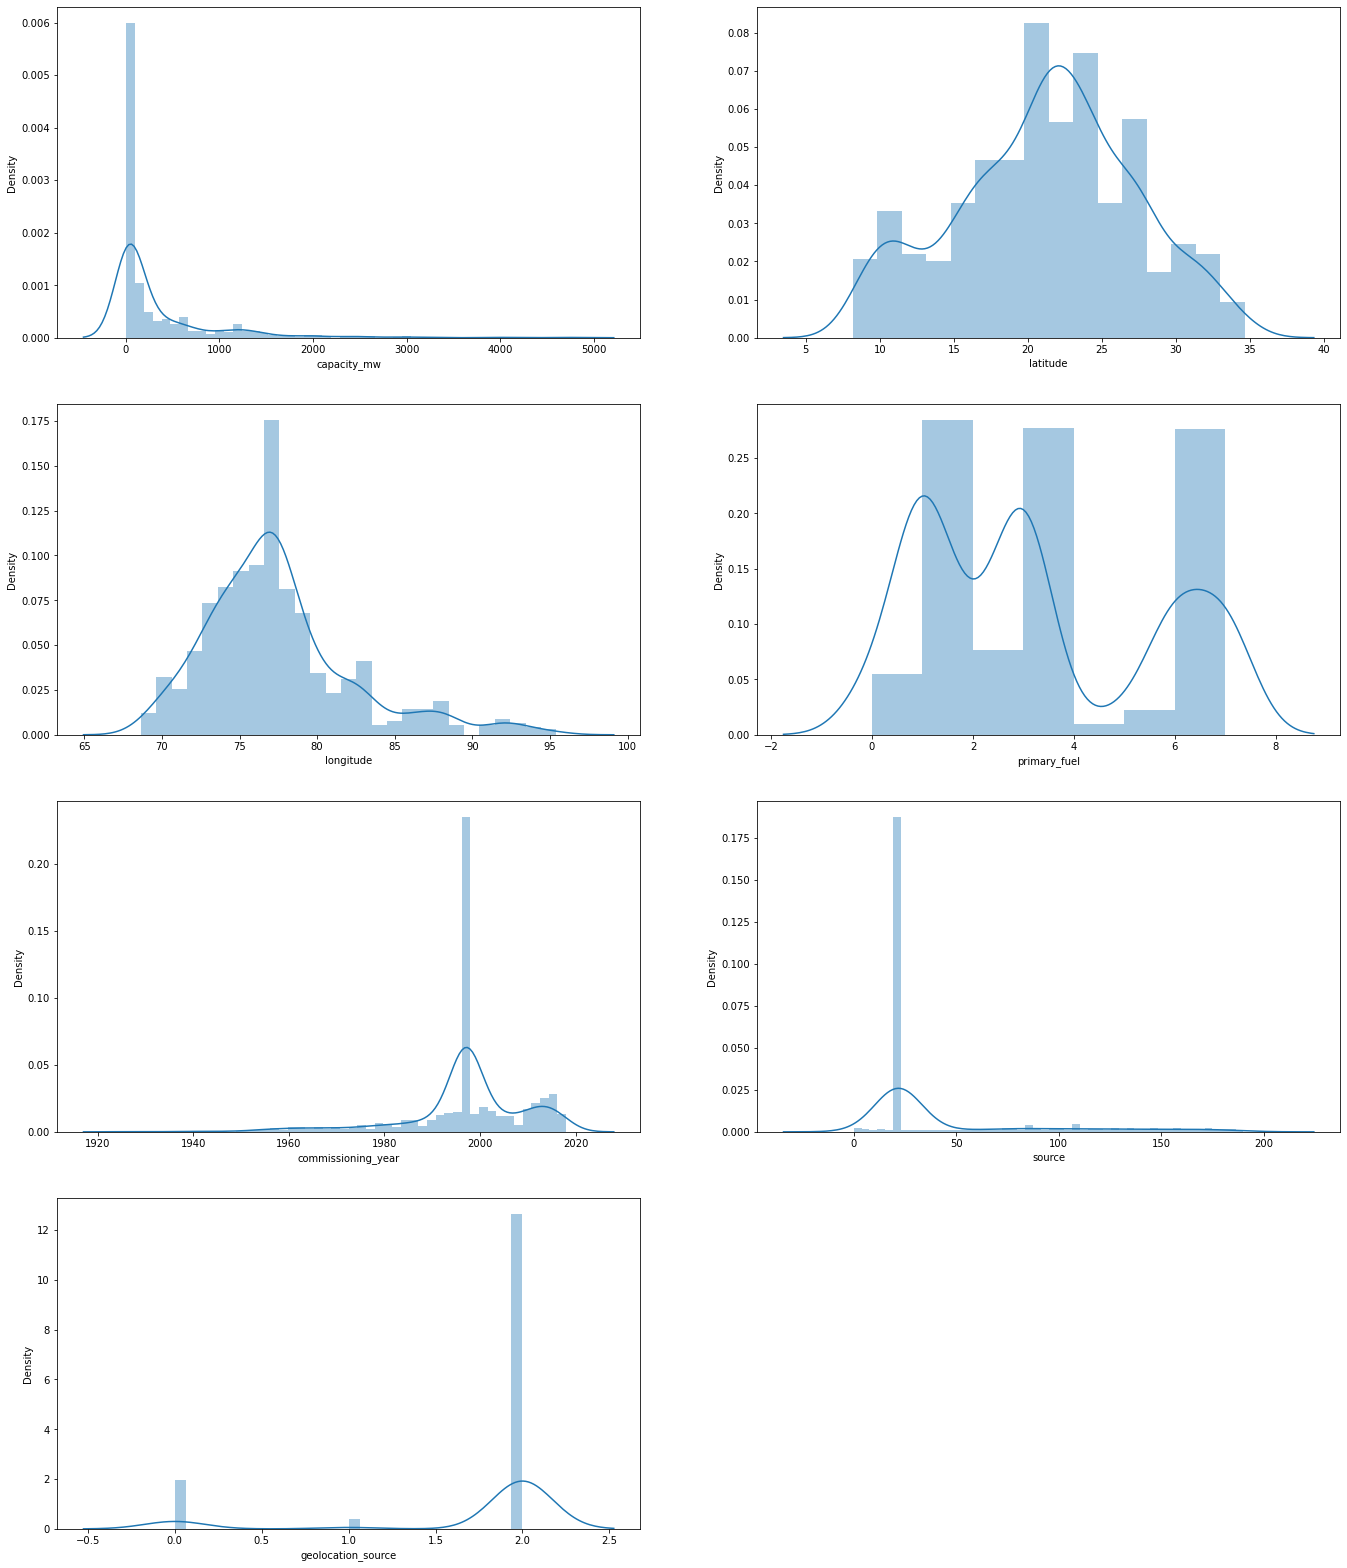

In [59]:
# Data Distribution after doing encoding

plt.figure(figsize=(23,28))
plot = 1
for i in df:
    if plot < 8:
        ax = plt.subplot(4,2,plot)
        sns.distplot(df[i])
    plot += 1
plt.show()


# Correlation Matrix

In [60]:
df_corr = df.corr()

df_corr


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
capacity_mw,1.000000,0.050984,0.195882,-0.380395,0.274292,-0.242122,0.217865
latitude,0.050984,1.000000,0.036362,-0.010204,0.102069,0.055927,-0.182426
longitude,0.195882,0.036362,1.000000,-0.347948,0.092331,-0.239333,0.249811
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,-0.126650,0.053613,-0.526540
commissioning_year,0.274292,0.102069,0.092331,-0.126650,1.000000,0.021528,-0.016150
source,-0.242122,0.055927,-0.239333,0.053613,0.021528,1.000000,-0.497678
geolocation_source,0.217865,-0.182426,0.249811,-0.526540,-0.016150,-0.497678,1.000000


<AxesSubplot:>

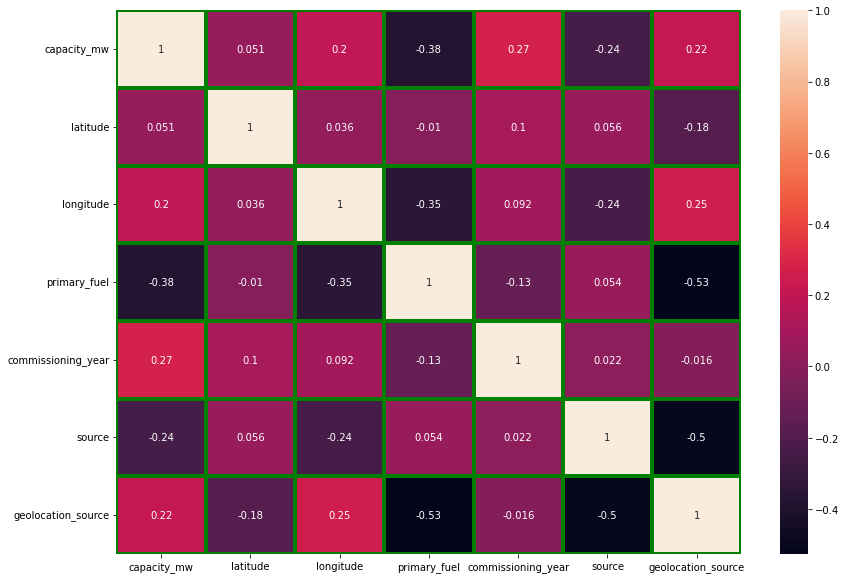

In [61]:
plt.figure(figsize=(14,10))
sns.heatmap(df_corr,annot=True,linecolor='green',linewidths=4)

# Correlation Bar Plot comparing features with our label

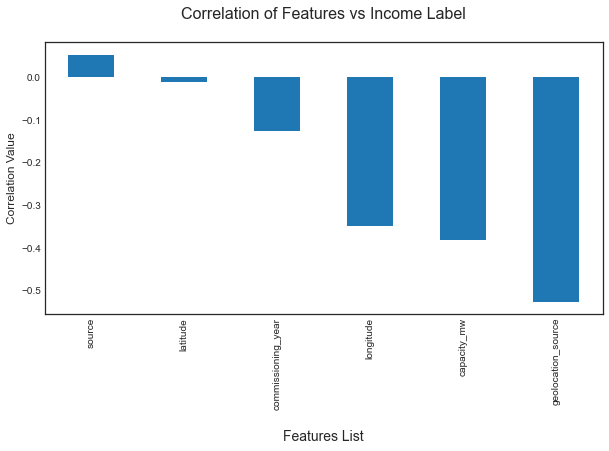

In [62]:
plt.style.use('seaborn-white')
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['primary_fuel'].sort_values(ascending=False).drop('primary_fuel').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()


**Since the heatmap was not able to give us a clear picture on positive and negative correlation columns I have generated this bar plot and I see that columns are the only one's negatively correlated rest all the other feature columns are positively correlated with our label column**

* Now I will consider outliers

# Using Z score to treat outliers

In [63]:
from scipy.stats import zscore
z = np.abs(zscore(df))
z

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,0.548908,1.149805,0.878280,1.225688,1.069162e+00,1.460215,1.041838
1,0.386977,0.587311,0.593788,0.967877,1.747794e-14,2.917019,0.420928
2,0.486679,0.116179,1.682394,1.664401,1.747794e-14,0.512075,0.420928
3,0.324240,0.439989,2.889052,0.529164,5.310801e-01,0.489662,0.420928
4,2.498942,0.125479,1.027976,0.967877,1.376637e+00,0.489662,0.420928
...,...,...,...,...,...,...,...
902,2.159821,0.806975,0.022477,0.967877,1.453505e+00,0.489662,0.420928
903,0.548060,1.366853,0.145644,1.225688,1.747794e-14,0.743019,2.504604
904,0.509909,0.974707,0.391673,1.664401,1.747794e-14,0.512075,0.420928
905,0.417498,0.518793,0.772866,0.967877,1.747794e-14,0.339596,0.420928


In [64]:
#Z_Score 
threshold = 3
df1 = df[(z<3).all(axis=1)]
df1

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.000000,109,1
1,98.0,24.7663,74.6090,1,1997.091082,174,2
2,39.2,21.9038,69.3732,7,1997.091082,21,2
3,135.0,23.8712,91.3602,2,2004.000000,22,2
4,1800.0,21.9603,82.4091,1,2015.000000,22,2
...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.000000,22,2
903,3.0,12.8932,78.1654,6,1997.091082,77,0
904,25.5,15.2758,75.5811,7,1997.091082,21,2
905,80.0,24.3500,73.7477,1,1997.091082,59,2


In [65]:
print(df.shape)
print(df1.shape)

(907, 7)
(837, 7)


In [66]:
df = df1.copy()
df

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.000000,109,1
1,98.0,24.7663,74.6090,1,1997.091082,174,2
2,39.2,21.9038,69.3732,7,1997.091082,21,2
3,135.0,23.8712,91.3602,2,2004.000000,22,2
4,1800.0,21.9603,82.4091,1,2015.000000,22,2
...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.000000,22,2
903,3.0,12.8932,78.1654,6,1997.091082,77,0
904,25.5,15.2758,75.5811,7,1997.091082,21,2
905,80.0,24.3500,73.7477,1,1997.091082,59,2


In [67]:
#Post Outlier Treatment skewness has changed slightly
df.skew()

capacity_mw           1.965229
latitude             -0.112961
longitude             0.902538
primary_fuel          0.417885
commissioning_year   -0.841353
source                1.790332
geolocation_source   -1.975392
dtype: float64

**The data preprocessing for classification and regression phase has been done.I will move towards buliding my model**

# Classification Phase

**Splitting the data into X and Y**

In [233]:
df.head()

,Model Name,Accuracy Score,Cross Validation Score,K Fold,Stratified K Fold,Stratified Shuffle Split


In [69]:
X = df.drop(['primary_fuel'],axis=1)
Y = df['primary_fuel']

In [70]:
X.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,2011.000000,109,1
1,98.0,24.7663,74.6090,1997.091082,174,2
2,39.2,21.9038,69.3732,1997.091082,21,2
3,135.0,23.8712,91.3602,2004.000000,22,2
4,1800.0,21.9603,82.4091,2015.000000,22,2


In [71]:
Y.head()

0    6
1    1
2    7
3    2
4    1
Name: primary_fuel, dtype: int32

# Converting Imbalanced dataset into Balanced dataset

In [72]:
Y.value_counts()

1    234
3    221
7    123
6    121
2     64
0     45
5     20
4      9
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

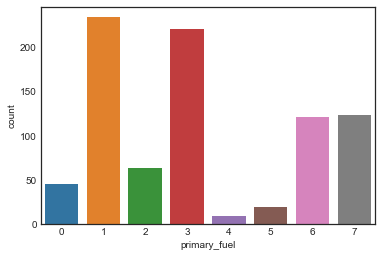

In [73]:
sns.countplot(Y)

In [74]:
from imblearn.over_sampling import SMOTE

# adding samples to make all the categorical label values same
oversample = SMOTE()
X,Y = oversample.fit_resample(X,Y)


In [75]:
Y.value_counts()

6    234
1    234
7    234
2    234
3    234
0    234
5    234
4    234
Name: primary_fuel, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

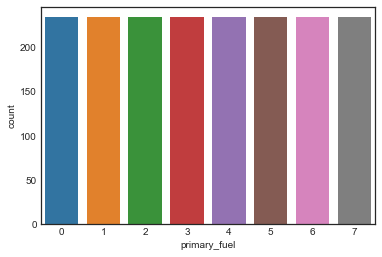

In [76]:
sns.countplot(Y)

**After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the classification machine learning model does not get biased towards one category**

# Power Transfomer

In [77]:
from sklearn.preprocessing import PowerTransformer

In [78]:
p_transform = PowerTransformer(method = 'yeo-johnson')
X = pd.DataFrame(p_transform.fit_transform(X), columns=X.columns)
X.head(5)

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.791076,1.447772,-0.924190,1.701692,1.461263,-2.270693
1,0.181766,0.881410,-0.419023,-0.125707,1.918109,0.413933
2,-0.331319,0.394085,-2.738613,-0.125707,-0.579609,0.413933
3,0.359336,0.730381,2.745658,0.725771,-0.512056,0.413933
4,1.744224,0.403830,1.566214,2.316037,-0.512056,0.413933


**I have transformed the values in a normal distribution and now next scaling the data** m

# Feature Scaling

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X_scaled.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.791076,1.447772,-0.924210,1.701692,1.461263,-2.270693
1,0.181766,0.881410,-0.419044,-0.125707,1.918109,0.413933
2,-0.331319,0.394085,-2.738634,-0.125707,-0.579609,0.413933
3,0.359336,0.730381,2.745637,0.725771,-0.512056,0.413933
4,1.744224,0.403830,1.566194,2.316037,-0.512056,0.413933


**I have scaled the values and now I will check for multicollinearity using vif method**

In [80]:
# data frame of vif
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

              feature       VIF
0         capacity_mw  1.491745
1            latitude  1.116739
2           longitude  1.154800
3  commissioning_year  1.079495
4              source  1.192734
5  geolocation_source  1.479538


**Since variables have vif less than 10 ,so here I can conclude that there is no multicollinearity in our feature variables.then next step is model building part**

# Model Building

In [81]:
#data
X_scaled

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.791076,1.447772,-0.924210,1.701692,1.461263,-2.270693
1,0.181766,0.881410,-0.419044,-0.125707,1.918109,0.413933
2,-0.331319,0.394085,-2.738634,-0.125707,-0.579609,0.413933
3,0.359336,0.730381,2.745637,0.725771,-0.512056,0.413933
4,1.744224,0.403830,1.566194,2.316037,-0.512056,0.413933
...,...,...,...,...,...,...
1867,0.025943,0.271880,0.460716,-0.125707,-0.579609,-2.270693
1868,0.195996,0.032004,-0.963507,-0.125707,-0.579609,0.413933
1869,-0.690868,0.224938,-0.548328,-0.125707,-0.579609,0.413933
1870,-0.764345,-1.759211,0.462189,-0.125707,-0.579609,0.413933


In [82]:
Y

0       6
1       1
2       7
3       2
4       1
       ..
1867    7
1868    7
1869    7
1870    7
1871    7
Name: primary_fuel, Length: 1872, dtype: int32

# Logistic Regression

# Finding the best random state for our model

In [101]:
maxAccuracy=0
maxRandomState=0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(X_scaled,Y,test_size=0.30,random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_lr = lr.predict(x_test)
    accuracy_lr = accuracy_score(y_test,y_lr)*100
    
    if accuracy_lr > maxAccuracy:
        maxAccuracy = accuracy_lr
        maxRandomState = i
        
print("Best random state is ",maxRandomState,"with accuracy",accuracy_lr)

Best random state is  33 with accuracy 61.56583629893239


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score,plot_confusion_matrix,plot_roc_curve
from sklearn.model_selection import cross_val_score,KFold,StratifiedShuffleSplit,StratifiedKFold

In [111]:
#70%Training Data and 30%Testing Data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=55)

#training our model
lr=LogisticRegression()
lr.fit(x_train, y_train)

#Predicting y_test
y_lr = lr.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_lr)

#Accuracy Score
print("Accuracy score : ", accuracy_lr*100)

print("-----------------------------------------------------------------------")

#Cross Validation Score
cross_val_lr = cross_val_score(lr,X_scaled,Y,cv=5)
print(cross_val_lr)
print("Cross Validation Score : ",cross_val_lr.mean())

print("-----------------------------------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_lr))

print("-----------------------------------------------------------------------")

#Classification Report
print(classification_report(y_test,y_lr))

Accuracy score :  67.43772241992883
-----------------------------------------------------------------------
[0.62133333 0.64533333 0.61497326 0.6631016  0.61497326]
Cross Validation Score :  0.6319429590017827
-----------------------------------------------------------------------
[[64  0  0  0  0  6  0  2]
 [ 8 28  8  6  8  1  0  1]
 [ 3 16 21  4 12  6  0  2]
 [ 0 11  4 27  8  4  0  4]
 [ 0  0  1 10 68  0  0  0]
 [ 9  1  0 13  6 27  0  9]
 [ 0  0  0  0  0  0 83  3]
 [ 0  0  0  2  0  5 10 61]]
-----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        72
           1       0.50      0.47      0.48        60
           2       0.62      0.33      0.43        64
           3       0.44      0.47      0.45        58
           4       0.67      0.86      0.75        79
           5       0.55      0.42      0.47        65
           6       0.89      0.97      0.93       

In [112]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
l1 = cross_val_score(lr,X_scaled,Y,cv=K_fold)
print(l1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , l1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.528      0.51733333 0.42513369 0.12299465 0.48128342]
--------------------------------------------------
K-Fold Cross Validation Score :  41.49490196078431


In [113]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.30)
print(Stratified_Shuffle)
l2 = cross_val_score(lr,X_scaled,Y,cv=Stratified_Shuffle)
print(l2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",l2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=None)
[0.63701068 0.6316726  0.62455516 0.59430605 0.64234875]
--------------------------------------------------
 Stratified Shuffle Split :  62.59786476868327


In [114]:
[#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)]
l3 = cross_val_score(lr,X_scaled,Y,cv=Stra_K_fold)
print(l3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",l3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.62133333 0.64533333 0.61497326 0.6631016  0.61497326]
--------------------------------------------------------
Stratified K Fold :  63.19429590017827


**From the above splits I consider that the score for logistic regression has better split in Stratified K fold and in Stratified Shuffle Split**
**I have created a pretty table to get the overall accuracy scores in logistic regression model due to understand the model**

In [151]:
from prettytable import PrettyTable

In [152]:
pretty_table=PrettyTable(['Model Name','Accuracy Score','Cross Validation Score','K Fold','Stratified K Fold','Stratified Shuffle Split'])

In [153]:
pretty_table.add_row(['Logistic Regression','67.43','63.19','41.49','63.19','62.19'])

In [154]:
print(pretty_table)

+---------------------+----------------+------------------------+--------+-------------------+--------------------------+
|      Model Name     | Accuracy Score | Cross Validation Score | K Fold | Stratified K Fold | Stratified Shuffle Split |
+---------------------+----------------+------------------------+--------+-------------------+--------------------------+
| Logistic Regression |     67.43      |         63.19          | 41.49  |       63.19       |          62.19           |
+---------------------+----------------+------------------------+--------+-------------------+--------------------------+


# DECISION TREE

**Finding the best random state for the model**

In [155]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    dt=DecisionTreeClassifier()
    dt.fit(x_train, y_train)
    y_dt = dt.predict(x_test)
    accuracy_dt = accuracy_score(y_test, y_dt)
    
    if accuracy_dt>maxAccuracy:
        maxAccuracy=accuracy_dt
        maxRandomState=i

print("Best random state is ",maxRandomState,"with accuracy",accuracy_dt)

Best random state is  16 with accuracy 0.8540925266903915


In [156]:
#70%Training Data and 30%Testing Data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=16)

#training our model
dt=DecisionTreeClassifier()
dt.fit(x_train, y_train)

#Predicting y_test
y_dt = dt.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_dt)

#Accuracy Score
print("Accuracy score : ", accuracy_dt*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_dt = cross_val_score(dt,X_scaled,Y,cv=5)
print(cross_val_dt)
print("Cross Validation Score : ",cross_val_dt.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_dt))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_dt))

Accuracy score :  87.54448398576513
---------------------------------------------
[0.832      0.86133333 0.89037433 0.85561497 0.87165775]
Cross Validation Score :  0.8621960784313727
---------------------------------------------
[[67  3  0  0  0  4  0  0]
 [ 5 37 15 10  1  2  0  0]
 [ 0  4 48  2  5  2  0  0]
 [ 0  5  3 44  1  3  0  0]
 [ 0  0  1  0 73  0  0  0]
 [ 1  2  0  1  0 64  0  0]
 [ 0  0  0  0  0  0 81  0]
 [ 0  0  0  0  0  0  0 78]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        74
           1       0.73      0.53      0.61        70
           2       0.72      0.79      0.75        61
           3       0.77      0.79      0.78        56
           4       0.91      0.99      0.95        74
           5       0.85      0.94      0.90        68
           6       1.00      1.00      1.00        81
           7       1.00      1.00      1.00        78

    accuracy       

**I will use K fold ,Stratified Shuffle Split and Stratified K Fold to compare the scores and choose better score**

In [157]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
d1 = cross_val_score(dt,X_scaled,Y,cv=K_fold)
print(d1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , d1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.77866667 0.78133333 0.79946524 0.56951872 0.86898396]
--------------------------------------------------
K-Fold Cross Validation Score :  75.95935828877005


In [158]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.30)
print(Stratified_Shuffle)
d2 = cross_val_score(dt,X_scaled,Y,cv=Stratified_Shuffle)
print(d2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",d2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=None)
[0.84519573 0.87366548 0.84341637 0.86120996 0.83629893]
--------------------------------------------------
 Stratified Shuffle Split :  85.19572953736656


In [159]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
d3 = cross_val_score(dt,X_scaled,Y,cv=Stra_K_fold)
print(d3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",d3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.83466667 0.86933333 0.87967914 0.85294118 0.86096257]
--------------------------------------------------------
Stratified K Fold :  85.9516577540107


**From the above splits I consider that the score for decision tree has better split in Stratified K fold and in Stratified Shuffle Split**

**I have created a pretty table to get the overall accuracy scores in decision tree model to have a clear understanding about the model**

In [168]:
pretty_table1= PrettyTable(['Model Name','Accuracy Score','Cross Validation Score','K Fold','Stratified K Fold','Stratified Shuffle Split'])

In [169]:
pretty_table1.add_row(['Decision Tree','85.40','86.21','75.95','85.95','85.19'])

In [170]:
print(pretty_table1)

+---------------+----------------+------------------------+--------+-------------------+--------------------------+
|   Model Name  | Accuracy Score | Cross Validation Score | K Fold | Stratified K Fold | Stratified Shuffle Split |
+---------------+----------------+------------------------+--------+-------------------+--------------------------+
| Decision Tree |     85.40      |         86.21          | 75.95  |       85.95       |          85.19           |
+---------------+----------------+------------------------+--------+-------------------+--------------------------+


# KNN

# **Finding the best random state for my model**

In [171]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    knn=KNeighborsClassifier()
    knn.fit(x_train, y_train)
    y_knn = knn.predict(x_test)
    accuracy_knn = accuracy_score(y_test, y_knn)
    
    if accuracy_knn>maxAccuracy:
        maxAccuracy=accuracy_knn
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.8558718861209964  on Random State 48


In [176]:
#70% Training Data and 30% Testing Data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=48)

#training our model
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)

#Predicting y_test
y_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_knn)

#Accuracy Score
print("Accuracy score : ", accuracy_knn*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_knn = cross_val_score(knn,X_scaled,Y,cv=5)
print(cross_val_knn)
print("Cross Validation Score : ",cross_val_knn.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_knn))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_knn))

Accuracy score :  85.58718861209964
---------------------------------------------
[0.83733333 0.82133333 0.83957219 0.82620321 0.8342246 ]
Cross Validation Score :  0.8317333333333334
---------------------------------------------
[[76  2  0  0  0  0  0  1]
 [ 4 37  8  2  6  2  0  0]
 [ 0  6 51  3  8  6  0  4]
 [ 0  7  6 44  3  3  0  6]
 [ 0  0  0  0 74  0  0  0]
 [ 0  0  0  0  1 71  0  1]
 [ 0  0  0  0  0  0 71  1]
 [ 0  0  1  0  0  0  0 57]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.96        79
           1       0.71      0.63      0.67        59
           2       0.77      0.65      0.71        78
           3       0.90      0.64      0.75        69
           4       0.80      1.00      0.89        74
           5       0.87      0.97      0.92        73
           6       1.00      0.99      0.99        72
           7       0.81      0.98      0.89        58

    accuracy       

In [177]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
k1 = cross_val_score(knn,X_scaled,Y,cv=K_fold)
print(k1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , k1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.69333333 0.71733333 0.76737968 0.32352941 0.85026738]
--------------------------------------------------
K-Fold Cross Validation Score :  67.03686274509805


In [178]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.30)
print(Stratified_Shuffle)
k2 = cross_val_score(knn,X_scaled,Y,cv=Stratified_Shuffle)
print(k2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",k2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=None)
[0.82206406 0.80604982 0.82918149 0.84697509 0.83451957]
--------------------------------------------------
 Stratified Shuffle Split :  82.77580071174377


In [179]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
k3 = cross_val_score(knn,X_scaled,Y,cv=Stra_K_fold)
print(k3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",k3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.83733333 0.82133333 0.83957219 0.82620321 0.8342246 ]
--------------------------------------------------------
Stratified K Fold :  83.17333333333335


In [181]:
pretty_table2= PrettyTable(['Model Name','Accuracy Score','Cross Validation Score','K Fold','Stratified K Fold','Stratified Shuffle Split'])

In [182]:
pretty_table2.add_row(['KNN','85.58','83.17','67.03','82.77','83.17'])

In [183]:
print(pretty_table2)

+------------+----------------+------------------------+--------+-------------------+--------------------------+
| Model Name | Accuracy Score | Cross Validation Score | K Fold | Stratified K Fold | Stratified Shuffle Split |
+------------+----------------+------------------------+--------+-------------------+--------------------------+
|    KNN     |     85.58      |         83.17          | 67.03  |       82.77       |          83.17           |
+------------+----------------+------------------------+--------+-------------------+--------------------------+


# Random Forest

**Finding the best random state for my model**

In [186]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    rf=RandomForestClassifier()
    rf.fit(x_train, y_train)
    y_rf = rf.predict(x_test)
    accuracy_rf = accuracy_score(y_test, y_rf)
    
    if accuracy_rf>maxAccuracy:
        maxAccuracy=accuracy_rf
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.9288256227758007  on Random State 10


In [197]:
#70% Training Data and 30% Testing Data
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=10)

#training our model
rf=RandomForestClassifier()
rf.fit(x_train, y_train)

#Predicting y_test
y_rf = rf.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_rf)

#Accuracy Score
print("Accuracy score : ", accuracy_rf*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_rf = cross_val_score(rf,X_scaled,Y,cv=5)
print(cross_val_rf)
print("Cross Validation Score : ",cross_val_rf.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_rf))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_rf))

Accuracy score :  92.70462633451957
---------------------------------------------
[0.90133333 0.904      0.91176471 0.88770053 0.90641711]
Cross Validation Score :  0.902243137254902
---------------------------------------------
[[74  1  0  0  0  0  0  0]
 [ 4 47  5  1  4  1  0  0]
 [ 0  5 49  2  4  2  0  0]
 [ 0  4  2 53  4  0  0  0]
 [ 0  0  0  0 67  0  0  0]
 [ 1  0  1  0  0 75  0  0]
 [ 0  0  0  0  0  0 83  0]
 [ 0  0  0  0  0  0  0 73]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.99      0.96        75
           1       0.82      0.76      0.79        62
           2       0.86      0.79      0.82        62
           3       0.95      0.84      0.89        63
           4       0.85      1.00      0.92        67
           5       0.96      0.97      0.97        77
           6       1.00      1.00      1.00        83
           7       1.00      1.00      1.00        73

    accuracy        

In [198]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
r1 = cross_val_score(rf,X_scaled,Y,cv=K_fold)
print(r1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , r1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.824      0.83466667 0.86898396 0.49197861 0.93315508]
--------------------------------------------------
K-Fold Cross Validation Score :  79.05568627450981


In [199]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.30)
print(Stratified_Shuffle)
r2 = cross_val_score(rf,X_scaled,Y,cv=Stratified_Shuffle)
print(r2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",r2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=None)
[0.91459075 0.89323843 0.90569395 0.89857651 0.90569395]
--------------------------------------------------
 Stratified Shuffle Split :  90.355871886121


In [200]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
r3 = cross_val_score(rf,X_scaled,Y,cv=Stra_K_fold)
print(r3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",r3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.89866667 0.89333333 0.9197861  0.88770053 0.91176471]
--------------------------------------------------------
Stratified K Fold :  90.22502673796792


In [201]:
pretty_table3 = PrettyTable(['Model Name','Accuracy Score','Cross Validation Score','K Fold','Stratified K Fold','Stratified Shuffle Split'])

In [205]:
pretty_table3.add_row(['Random Forest','92.70','90.22','79.05','90.22','90.35'])

In [206]:
print(pretty_table3)

+---------------+----------------+------------------------+--------+-------------------+--------------------------+
|   Model Name  | Accuracy Score | Cross Validation Score | K Fold | Stratified K Fold | Stratified Shuffle Split |
+---------------+----------------+------------------------+--------+-------------------+--------------------------+
| Random Forest |     91.99      |         90.75          | 79.10  |       90.11       |          90.28           |
| Random Forest |     92.70      |         90.22          | 79.05  |       90.22       |          90.35           |
+---------------+----------------+------------------------+--------+-------------------+--------------------------+


# Gradient Boost

 **Finding the best random state for our model**

In [204]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=i)
    gb=GradientBoostingClassifier()
    gb.fit(x_train, y_train)
    y_gb = gb.predict(x_test)
    accuracy_gb = accuracy_score(y_test, y_gb)
    
    if accuracy_gb>maxAccuracy:
        maxAccuracy=accuracy_gb
        maxRandomState=i

print("Best accuracy score is", maxAccuracy ," on Random State", maxRandomState)

Best accuracy score is 0.9145907473309609  on Random State 19


In [207]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.30, random_state=19)

#training our model
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)

#Predicting y_test
y_gb = gb.predict(x_test)
accuracy_gb = accuracy_score(y_test, y_gb)

#Accuracy Score
print("Accuracy score : ", accuracy_gb*100)

print("---------------------------------------------")

#Cross Validation Score
cross_val_gb = cross_val_score(gb,X_scaled,Y,cv=5)
print(cross_val_gb)
print("Cross Validation Score : ",cross_val_gb.mean())

print("---------------------------------------------")

#Confusion Matrix
print(confusion_matrix(y_test,y_gb))

print("---------------------------------------------")

#Classification Report
print(classification_report(y_test,y_gb))

Accuracy score :  91.45907473309609
---------------------------------------------
[0.87466667 0.87733333 0.89839572 0.87165775 0.86898396]
Cross Validation Score :  0.8782074866310159
---------------------------------------------
[[66  0  0  0  0  1  0  0]
 [ 3 52  5  1  2  0  0  0]
 [ 0  5 50  0  3  4  0  0]
 [ 0  2  5 55  3  6  0  0]
 [ 0  0  0  1 60  0  0  0]
 [ 0  1  3  0  3 73  0  0]
 [ 0  0  0  0  0  0 69  0]
 [ 0  0  0  0  0  0  0 89]]
---------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.87      0.83      0.85        63
           2       0.79      0.81      0.80        62
           3       0.96      0.77      0.86        71
           4       0.85      0.98      0.91        61
           5       0.87      0.91      0.89        80
           6       1.00      1.00      1.00        69
           7       1.00      1.00      1.00        89

    accuracy       

In [208]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
g1 = cross_val_score(gb,X_scaled,Y,cv=K_fold)
print(g1)
print("--------------------------------------------------")
print("K-Fold Cross Validation Score : " , g1.mean()*100)

KFold(n_splits=5, random_state=None, shuffle=False)
[0.776      0.80533333 0.8342246  0.44652406 0.9171123 ]
--------------------------------------------------
K-Fold Cross Validation Score :  75.58388591800356


In [209]:
#Stratified K fold Cross Validation
Stra_K_fold = StratifiedKFold(n_splits=5)
print(Stra_K_fold)
g3 = cross_val_score(gb,X_scaled,Y,cv=Stra_K_fold)
print(g3)
print("--------------------------------------------------------")
print("Stratified K Fold : ",g3.mean()*100)

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
[0.87733333 0.88       0.89839572 0.87165775 0.86898396]
--------------------------------------------------------
Stratified K Fold :  87.92741532976827


In [210]:
#Stratified Shuffle Split
Stratified_Shuffle = StratifiedShuffleSplit(n_splits=5,test_size=0.30)
print(Stratified_Shuffle)
g2 = cross_val_score(gb,X_scaled,Y,cv=Stratified_Shuffle)
print(g2)
print("--------------------------------------------------")
print(" Stratified Shuffle Split : ",g2.mean()*100)

StratifiedShuffleSplit(n_splits=5, random_state=None, test_size=0.3,
            train_size=None)
[0.88434164 0.89679715 0.86654804 0.87366548 0.86120996]
--------------------------------------------------
 Stratified Shuffle Split :  87.65124555160142


**From the above splits I consider that the score for random forest tree has better split in Stratified K fold and in Stratified Shuffle Split**

**I have created a pretty table to get the overall accuracy scores in decision tree model to have a clear understanding about the model**

In [211]:
pretty_table4 = PrettyTable(['Model Name','Accuracy Score','Cross Validation Score','K Fold','Stratified K Fold','Stratified Shuffle Split'])

In [212]:
pretty_table4.add_row(['Gradient Boost','91.45','87.82','77.58','87.65','87.92'])
print(pretty_table4)

+----------------+----------------+------------------------+--------+-------------------+--------------------------+
|   Model Name   | Accuracy Score | Cross Validation Score | K Fold | Stratified K Fold | Stratified Shuffle Split |
+----------------+----------------+------------------------+--------+-------------------+--------------------------+
| Gradient Boost |     91.45      |         87.82          | 77.58  |       87.65       |          87.92           |
+----------------+----------------+------------------------+--------+-------------------+--------------------------+


# HyperParameter Tuning

In [213]:
#Choosing Random Forest Classifier

params = {
    'n_estimators' : [100,120,150,170],
    'criterion' : ['gini','entropy','log_loss'],
    'max_depth' : [2,4,6,8],
    'min_samples_split' : [1,2,3],
    'max_features' : ['sqrt','log2']
}

**After comparing all the classification models I have selected Random Forest Classifier as my best model and have listed down it's parameters above referring the sklearn webpage. The reason behind selecting Random Forest Classifier is because it got the highest accuracy score plus the cross validation score was even better for this model**

In [214]:
gs_rf = GridSearchCV(rf,param_grid=params,cv=5)

gs_rf

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 120, 150, 170]})

**here using the Grid Search CV method for hyper parameter tuning my best classification model**

In [215]:
gs_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 4, 6, 8],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [100, 120, 150, 170]})

In [216]:
gs_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 170}

In [217]:
gs_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=8, n_estimators=170)

In [218]:
gs_rf.best_score_

0.8748091603053435

In [219]:
gs_rf.cv_results_['mean_test_score']

array([       nan,        nan,        nan,        nan, 0.65114504,
       0.6740458 , 0.67557252, 0.66259542, 0.66717557, 0.66335878,
       0.65648855, 0.67022901,        nan,        nan,        nan,
              nan, 0.6610687 , 0.66870229, 0.65343511, 0.66793893,
       0.66412214, 0.66717557, 0.66030534, 0.66946565,        nan,
              nan,        nan,        nan, 0.76641221, 0.76412214,
       0.76641221, 0.76030534, 0.76641221, 0.75496183, 0.76259542,
       0.76641221,        nan,        nan,        nan,        nan,
       0.76793893, 0.75572519, 0.7648855 , 0.76259542, 0.76259542,
       0.7610687 , 0.75343511, 0.76946565,        nan,        nan,
              nan,        nan, 0.82442748, 0.82671756, 0.82290076,
       0.83435115, 0.8221374 , 0.82900763, 0.82366412, 0.8221374 ,
              nan,        nan,        nan,        nan, 0.82442748,
       0.83282443, 0.82290076, 0.82977099, 0.82824427, 0.82977099,
       0.8259542 , 0.82519084,        nan,        nan,        

In [220]:
final_model = RandomForestClassifier(max_depth=8, max_features='log2', n_estimators=120,criterion='log_loss',min_samples_split=2)
final_model.fit(x_train,y_train)
final_model_pred = final_model.predict(x_test)
print("Accuracy Score after Hyperparameter Tuning is : ",accuracy_score(y_test,final_model_pred)*100)
print('-'*70)
print("Classification Report after Hyperparameter Tuning is : "
      ,classification_report(y_test,final_model_pred))
print('-'*70)

Accuracy Score after Hyperparameter Tuning is :  88.07829181494662
----------------------------------------------------------------------
Classification Report after Hyperparameter Tuning is :                precision    recall  f1-score   support

           0       0.94      0.99      0.96        67
           1       0.85      0.65      0.74        63
           2       0.75      0.71      0.73        62
           3       0.92      0.77      0.84        71
           4       0.78      0.93      0.85        61
           5       0.81      0.93      0.87        80
           6       1.00      1.00      1.00        69
           7       0.97      1.00      0.98        89

    accuracy                           0.88       562
   macro avg       0.88      0.87      0.87       562
weighted avg       0.88      0.88      0.88       562

----------------------------------------------------------------------


**have successfully incorporated the Hyper Parameter Tuning on my Final Classification Model and received the accuracy score for it**

**So I can conclude that the parmeters I used in the Hyperparameter tuning have accuracy less than the default parameters used in the First Model for Random forest**

# Final Pretty Table

**Now I will be making a Pretty table to get the overall accuracy score of the models**

In [221]:
final_table = PrettyTable(['Model Name','Accuracy Score','Cross Validation Score','K Fold','Stratified K Fold','Stratified Shuffle Split'])

In [222]:
final_table.add_row(['Logistic Regression','67.43','63.19','41.49','63.19','62.19'])

final_table.add_row(['Decision Tree','85.40','86.21','75.95','85.95','85.19'])

final_table.add_row(['KNN','85.58','83.17','67.03','82.77','83.17'])

final_table.add_row(['Random Forest','92.70','90.22','79.05','90.22','90.35'])

final_table.add_row(['Gradient Boost','91.45','87.82','77.58','87.65','87.92'])

In [223]:
print(final_table)

+---------------------+----------------+------------------------+--------+-------------------+--------------------------+
|      Model Name     | Accuracy Score | Cross Validation Score | K Fold | Stratified K Fold | Stratified Shuffle Split |
+---------------------+----------------+------------------------+--------+-------------------+--------------------------+
| Logistic Regression |     67.43      |         63.19          | 41.49  |       63.19       |          62.19           |
|    Decision Tree    |     85.40      |         86.21          | 75.95  |       85.95       |          85.19           |
|         KNN         |     85.58      |         83.17          | 67.03  |       82.77       |          83.17           |
|    Random Forest    |     92.70      |         90.22          | 79.05  |       90.22       |          90.35           |
|    Gradient Boost   |     91.45      |         87.82          | 77.58  |       87.65       |          87.92           |
+---------------------+-

# Saving the best model for Classification

In [230]:
import pickle, joblib
filename = "Global_Power_Plant_Database_Classification.pkl"
joblib.dump(rf, filename)

['Global_Power_Plant_Database_Classification.pkl']

# Finally I am saving my best classification model using the  joblib library.

# Regression Model

In [292]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.000000,109,1
1,98.0,24.7663,74.6090,1,1997.091082,174,2
2,39.2,21.9038,69.3732,7,1997.091082,21,2
3,135.0,23.8712,91.3602,2,2004.000000,22,2
4,1800.0,21.9603,82.4091,1,2015.000000,22,2


**Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and regression label**

In [293]:
X_reg = df.drop(['capacity_mw'],axis=1)
Y_reg = df['capacity_mw']

In [294]:
X_reg.head()

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,28.1839,73.2407,6,2011.000000,109,1
1,24.7663,74.6090,1,1997.091082,174,2
2,21.9038,69.3732,7,1997.091082,21,2
3,23.8712,91.3602,2,2004.000000,22,2
4,21.9603,82.4091,1,2015.000000,22,2


In [295]:
Y_reg.head()

0       2.5
1      98.0
2      39.2
3     135.0
4    1800.0
Name: capacity_mw, dtype: float64

In [296]:
X_reg.skew()

latitude             -0.149698
longitude             1.141881
primary_fuel          0.472251
commissioning_year   -1.399359
source                1.827373
geolocation_source   -2.030507
dtype: float64

# PowerTransformer

In [297]:
p_transform_ = PowerTransformer(method = 'yeo-johnson')
X_reg = pd.DataFrame(p_transform_.fit_transform(X_reg), columns=X_reg.columns)
X_reg.head()

,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.159436,-0.952545,1.171313,1.252259,1.582861,-2.136039
1,0.579032,-0.544976,-0.996291,-0.150251,2.036658,0.430617
2,0.099912,-2.379864,1.441576,-0.150251,-0.471879,0.430617
3,0.428491,2.174468,-0.362170,0.490702,-0.403248,0.430617
4,0.109302,1.117231,-0.996291,1.745320,-0.403248,0.430617


# Feature Scaling

# Model Building Phase for Regression Problem

# Linear Regression

# First we will start with Linear Regression to find the best random state for building our Linear Regression Model.

In [303]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,KFold,ShuffleSplit

In [304]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    y_lr = lr.predict(x_test)
    lr_r2 = r2_score(y_test, y_lr)
    
    if lr_r2>maxAccuracy:
        maxAccuracy=lr_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.3194929501954573  on Random State 37


In [305]:
x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=37)

#training our model
lr=LinearRegression()
lr.fit(x_train, y_train)

#Predicting y_test
y_lr = lr.predict(x_test)
lr_r2 = r2_score(y_test, y_lr)

#R2 Score
print("R2 score : ", lr_r2)

#Cross Validation Score
cross_val_lr = cross_val_score(lr,X_reg,Y_reg,cv=5)
print(cross_val_lr)
print("Cross Validation Score : ",cross_val_lr.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_lr))
print("Mean Square Error : ",mean_squared_error(y_test,y_lr))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_lr)))

R2 score :  0.3194929501954573
[0.15249901 0.22983445 0.17431212 0.27171366 0.25096645]
Cross Validation Score :  0.21586513793876363
Mean Absolute Error : 301.1517868001605
Mean Square Error :  230273.5341313196
Root Mean Square Error : 479.86824663788667


In [306]:
#K-fold cross validation
K_fold = KFold(5)
print(K_fold)
l1 = cross_val_score(lr,X_reg,Y_reg,cv=K_fold)
print(l1)
print("K-Fold Cross Validation Score : " , l1.mean())

print('-'*80)

#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
l2 = cross_val_score(lr,X_reg,Y_reg,cv=shuffle)
print(l2)
print("Shuffle Split : ",l2.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.15249901 0.22983445 0.17431212 0.27171366 0.25096645]
K-Fold Cross Validation Score :  0.21586513793876363
--------------------------------------------------------------------------------
ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[0.19149054 0.19674807 0.21071297 0.22449433 0.26647873]
Shuffle Split :  0.21798492662477154


# Decision Tree

**Finding best random state for the model**

In [307]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=i)
    dt=DecisionTreeRegressor()
    dt.fit(x_train, y_train)
    y_dt = dt.predict(x_test)
    dt_r2 = r2_score(y_test, y_dt)
    
    if dt_r2>maxAccuracy:
        maxAccuracy=dt_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.4442336672263836  on Random State 95


In [314]:
x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=95)

#training our model
dt=DecisionTreeRegressor()
dt.fit(x_train, y_train)

#Predicting y_test
y_dt = dt.predict(x_test)
dt_r2 = r2_score(y_test, y_dt)

#R2 Score
print("R2 score : ", dt_r2)

#Cross Validation Score
cross_val_dt = cross_val_score(dt,X_reg,Y_reg,cv=5)
print(cross_val_dt)
print("Cross Validation Score : ",cross_val_dt.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_dt))
print("Mean Square Error : ",mean_squared_error(y_test,y_dt))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_dt)))

R2 score :  0.44063514503939527
[-0.35046677 -0.04487128  0.03147403 -0.09507264  0.17683757]
Cross Validation Score :  -0.05641981886352145
Mean Absolute Error : 264.55148605240913
Mean Square Error :  260550.31967067643
Root Mean Square Error : 510.4412989469763


In [315]:
#K Fold Cross Validation
K_fold = KFold(5)
print(K_fold)
l11 = cross_val_score(dt,X_reg,Y_reg,cv=K_fold)
print(l11)
print("K-Fold Cross Validation Score : " , l11.mean())

print('-'*75)

#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
l21 = cross_val_score(dt,X_reg,Y_reg,cv=shuffle)
print(l21)
print("Shuffle Split : ",l21.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[ 0.02779919 -0.21780366  0.06812606  0.04832563  0.25048101]
K-Fold Cross Validation Score :  0.035385644836506566
---------------------------------------------------------------------------
ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[-0.21866194 -0.44613821 -0.25531894  0.35751225  0.22927867]
Shuffle Split :  -0.0666656339663021


# KNN

**Finding best random state for the model**

In [316]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=i)
    knn=KNeighborsRegressor()
    knn.fit(x_train, y_train)
    y_knn = knn.predict(x_test)
    knn_r2 = r2_score(y_test, y_knn)
    
    if knn_r2>maxAccuracy:
        maxAccuracy=knn_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.5136095232007643  on Random State 79


In [317]:
x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=79)

#training our model
knn=KNeighborsRegressor()
knn.fit(x_train, y_train)

#Predicting y_test
y_knn = knn.predict(x_test)
knn_r2 = r2_score(y_test, y_knn)

#R2 Score
print("R2 score : ", knn_r2)

#Cross Validation Score
cross_val_knn = cross_val_score(knn,X_reg,Y_reg,cv=5)
print(cross_val_knn)
print("Cross Validation Score : ",cross_val_knn.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_knn))
print("Mean Square Error : ",mean_squared_error(y_test,y_knn))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_knn)))

R2 score :  0.5136095232007643
[0.29184786 0.15311775 0.34337284 0.32053979 0.39325054]
Cross Validation Score :  0.3004257550394824
Mean Absolute Error : 216.32794285714283
Mean Square Error :  163603.87192873936
Root Mean Square Error : 404.4797546586718


In [318]:
#K-Fold
K_fold = KFold(5)
print(K_fold)
k = cross_val_score(knn,X_reg,Y_reg,cv=K_fold)
print(k)
print("K-Fold Cross Validation Score : " , k.mean())

print('-'*75)

#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
k1 = cross_val_score(knn,X_reg,Y_reg,cv=shuffle)
print(k1)
print("Shuffle Split : ",k1.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.29184786 0.15311775 0.34337284 0.32053979 0.39325054]
K-Fold Cross Validation Score :  0.3004257550394824
---------------------------------------------------------------------------
ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[0.3697619  0.46100668 0.3470943  0.50386707 0.44302511]
Shuffle Split :  0.42495101162175236


# Random Forest

**Finding best random state for the model**

In [313]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=i)
    rf=RandomForestRegressor()
    rf.fit(x_train, y_train)
    y_rf = rf.predict(x_test)
    rf_r2 = r2_score(y_test, y_rf)
    
    if rf_r2>maxAccuracy:
        maxAccuracy=rf_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.5825759319490497  on Random State 18


In [319]:
x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=18)

#training our model
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

#Predicting y_test
y_rf = rf.predict(x_test)
rf_r2 = r2_score(y_test, y_rf)

#R2 Score
print("R2 score : ", rf_r2)

#Cross Validation Score
cross_val_rf = cross_val_score(rf,X_reg,Y_reg,cv=5)
print(cross_val_rf)
print("Cross Validation Score : ",cross_val_rf.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_rf))
print("Mean Square Error : ",mean_squared_error(y_test,y_rf))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_rf)))

R2 score :  0.6140541602083992
[0.20405497 0.33501343 0.31650386 0.30611244 0.44922223]
Cross Validation Score :  0.32218138917443506
Mean Absolute Error : 184.08655158936966
Mean Square Error :  104422.23247127097
Root Mean Square Error : 323.14429048224105


In [320]:
#K-Fold
K_fold = KFold(5)
print(K_fold)
r = cross_val_score(rf,X_reg,Y_reg,cv=K_fold)
print(r)
print("K-Fold Cross Validation Score : " , r.mean())

print('-'*75)

#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
r1 = cross_val_score(rf,X_reg,Y_reg,cv=shuffle)
print(r1)
print("Shuffle Split : ",r1.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.20296285 0.35997718 0.2798295  0.31750616 0.46015261]
K-Fold Cross Validation Score :  0.3240856594655448
---------------------------------------------------------------------------
ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[0.50197039 0.20651556 0.48410457 0.438373   0.52625359]
Shuffle Split :  0.4314434225849295


# Ada Boost

In [321]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=i)
    ad=AdaBoostRegressor()
    ad.fit(x_train, y_train)
    y_ad = ad.predict(x_test)
    ad_r2 = r2_score(y_test, y_ad)
    
    if ad_r2>maxAccuracy:
        maxAccuracy=ad_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.4436073038361321  on Random State 28


In [322]:
x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=28)

#training our model
ad=AdaBoostRegressor()
ad.fit(x_train, y_train)

#Predicting y_test
y_ad = ad.predict(x_test)
ad_r2 = r2_score(y_test, y_ad)

#R2 Score
print("R2 score : ", ad_r2)

#Cross Validation Score
cross_score_ad = cross_val_score(ad,X_reg,Y_reg,cv=5)
print(cross_score_ad)
print("Cross Validation Score : ",cross_score_ad.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_ad))
print("Mean Square Error : ",mean_squared_error(y_test,y_ad))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_ad)))

R2 score :  0.4284864035123255
[-0.39269315 -0.59327066  0.16098252  0.20618258  0.17222192]
Cross Validation Score :  -0.08931535781941483
Mean Absolute Error : 311.63247383855014
Mean Square Error :  246952.7686267583
Root Mean Square Error : 496.943425982031


In [323]:
#K Fold
K_fold = KFold(5)
print(K_fold)
a = cross_val_score(ad,X_reg,Y_reg,cv=K_fold)
print(a)
print("K-Fold Cross Validation Score : " , a.mean())

print('-'*75)

#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
a1 = cross_val_score(ad,X_reg,Y_reg,cv=shuffle)
print(a1)
print("Shuffle Split : ",a1.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[-0.42814074 -0.3758762   0.11405776  0.42284894  0.32171979]
K-Fold Cross Validation Score :  0.010921909233736482
---------------------------------------------------------------------------
ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[ 0.0011059  -0.277873    0.27283952  0.13553327  0.4118666 ]
Shuffle Split :  0.1086944583408661


# Gradient Boost

**Finding best random state for the model**

In [324]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=i)
    gb=GradientBoostingRegressor()
    gb.fit(x_train, y_train)
    y_gb = gb.predict(x_test)
    gb_r2 = r2_score(y_test, y_gb)
    
    if gb_r2>maxAccuracy:
        maxAccuracy=gb_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.60664509695856  on Random State 52


In [325]:
x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=52)

#training our model
gb=GradientBoostingRegressor()
gb.fit(x_train, y_train)

#Predicting y_test
y_gb = gb.predict(x_test)
gb_r2 = r2_score(y_test, y_gb)

#R2 Score
print("R2 score : ", gb_r2)

#Cross Validation Score
cross_score_gb = cross_val_score(gb,X_reg,Y_reg,cv=5)
print(cross_score_gb)
print("Cross Validation Score : ",cross_score_gb.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_gb))
print("Mean Square Error : ",mean_squared_error(y_test,y_gb))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_gb)))

R2 score :  0.606988488491205
[0.16873175 0.40918611 0.38123185 0.40083449 0.48181975]
Cross Validation Score :  0.3683607920666867
Mean Absolute Error : 206.98032635787803
Mean Square Error :  137972.82598798102
Root Mean Square Error : 371.4469356287396


In [326]:
#K Fold
K_fold = KFold(5)
print(K_fold)
g = cross_val_score(gb,X_reg,Y_reg,cv=K_fold)
print(g)
print("K-Fold Cross Validation Score : " , g.mean())

print('-'*75)

#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
g1 = cross_val_score(gb,X_reg,Y_reg,cv=shuffle)
print(g1)
print("Shuffle Split : ",g1.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.1958833  0.41026644 0.38155146 0.40173649 0.48033779]
K-Fold Cross Validation Score :  0.3739550941819713
---------------------------------------------------------------------------
ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[0.3232867  0.31386177 0.52371028 0.14320206 0.45003409]
Shuffle Split :  0.3508189775246259


# XGBoost

In [327]:
maxAccuracy=0
maxRandomState=0

for i in range(1, 100):
    x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=i)
    xgbt=xgb.XGBRegressor()
    xgbt.fit(x_train, y_train)
    y_xgbt = xgbt.predict(x_test)
    xgbt_r2 = r2_score(y_test, y_xgbt)
    
    if xgbt_r2>maxAccuracy:
        maxAccuracy=xgbt_r2
        maxRandomState=i

print("Best r2 score is", maxAccuracy ," on Random State", maxRandomState)

Best r2 score is 0.5842692662980684  on Random State 18


In [328]:
x_train, x_test, y_train, y_test = train_test_split(X_reg, Y_reg, test_size=0.30, random_state=18)

#training our model
xgbt=xgb.XGBRegressor()
xgbt.fit(x_train, y_train)

#Predicting y_test
y_xgbt = xgbt.predict(x_test)
xgbt_r2 = r2_score(y_test, y_xgbt)

#R2 Score
print("R2 score : ", xgbt_r2)

#Cross Validation Score
cross_score_xgbt = cross_val_score(xgbt,X_reg,Y_reg,cv=5)
print(cross_score_xgbt)
print("Cross Validation Score : ",cross_score_xgbt.mean())

#Error Estimation Methods
print("Mean Absolute Error :",mean_absolute_error(y_test,y_xgbt))
print("Mean Square Error : ",mean_squared_error(y_test,y_xgbt))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,y_xgbt)))

R2 score :  0.5842692662980684
[0.16070548 0.15186778 0.23199297 0.36356859 0.44644971]
Cross Validation Score :  0.27091690579017697
Mean Absolute Error : 198.00276008529192
Mean Square Error :  112480.8894002228
Root Mean Square Error : 335.3817070148919


In [329]:
#K-Fold
K_fold = KFold(5)
print(K_fold)
xg = cross_val_score(xgbt,X_reg,Y_reg,cv=K_fold)
print(xg)
print("K-Fold Cross Validation Score : " , xg.mean())

print('-'*75)

#Shuffle Split
shuffle = ShuffleSplit(n_splits=5,test_size=0.30)
print(shuffle)
xg1 = cross_val_score(xgbt,X_reg,Y_reg,cv=shuffle)
print(xg1)
print("Shuffle Split : ",xg1.mean())

KFold(n_splits=5, random_state=None, shuffle=False)
[0.16070548 0.15186778 0.23199297 0.36356859 0.44644971]
K-Fold Cross Validation Score :  0.27091690579017697
---------------------------------------------------------------------------
ShuffleSplit(n_splits=5, random_state=None, test_size=0.3, train_size=None)
[0.33046462 0.16085689 0.4615285  0.51266131 0.52424469]
Shuffle Split :  0.39795120225415836


# HyperParamter Tuning

In [330]:
#Choosing Gradient Boost 

params = {
    'loss' : ['absolute_error','squared_error'],
    'learning_rate' : [0.1,0.01,0.001],
    'n_estimators' : [120,150,175],
    'criterion' : ['friedman_mse','squared_error','mse'],
    'min_samples_split' : [1,2,3,4]
}

**After comparing all the regression models I have selected Gradient Boost as my best model and have listed down it's parameters above referring the sklearn webpage**

In [331]:
gradient_search_gb = GridSearchCV(GradientBoostingRegressor(),param_grid=params,cv=5)

gradient_search_gb

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'loss': ['absolute_error', 'squared_error'],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [120, 150, 175]})

In [332]:
gradient_search_gb.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'loss': ['absolute_error', 'squared_error'],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [120, 150, 175]})

In [333]:
gradient_search_gb.best_params_

{'criterion': 'mse',
 'learning_rate': 0.01,
 'loss': 'squared_error',
 'min_samples_split': 2,
 'n_estimators': 175}

In [334]:
gradient_search_gb.best_score_

0.3610717299876164

In [335]:
final_model_rg = GradientBoostingRegressor(criterion='friedman_mse',learning_rate=0.01,loss='squared_error',min_samples_split=2,n_estimators=175)
print(final_model_rg)
print("------------------------------------------------------------------------")
final_model_rg.fit(x_train,y_train)
final_model_pred_reg = final_model_rg.predict(x_test)
print(final_model_pred_reg)
print("------------------------------------------------------------------------")
print("R2 Score :",r2_score(y_test,final_model_pred_reg))
print("------------------------------------------------------------------------")
print("Mean Absolute Error :",mean_absolute_error(y_test,final_model_pred_reg))
print("Mean Square Error : ",mean_squared_error(y_test,final_model_pred_reg))
print("Root Mean Square Error :",np.sqrt(mean_squared_error(y_test,final_model_pred_reg)))
print("------------------------------------------------------------------------")

GradientBoostingRegressor(learning_rate=0.01, n_estimators=175)
------------------------------------------------------------------------
[ 218.23786322  322.9039594    89.25637146  900.17665093  937.58697757
  937.58697757  453.34230591  961.27499292   85.4953809   232.06220582
  195.48745496  888.1841925   341.61135799  452.01976483  114.71721928
  961.27499292  739.86108233   92.49993403   92.49993403   92.49993403
   92.49993403   87.50135679  193.73244029   98.31149289   89.25637146
  739.86108233   92.49993403  937.58697757   89.25637146  224.14879298
  193.73244029  322.9039594   937.58697757   92.49993403  331.46721958
   92.49993403  316.31054024  164.83403681  335.58551132   92.49993403
   90.74491936   92.49993403   92.49993403  193.73244029   87.50135679
  190.17236287   89.25637146  195.48745496  211.60740067  164.83403681
  359.50780922  193.73244029   87.50135679  156.84662695  211.60740067
   92.49993403   92.49993403  164.83403681  348.19178116  164.83403681
  937.58697

# I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the R2 score for it

# So I will save the best model i.e the Gradient Forest which I have created in the model building phase which has the accuracy score of 54%.The data in the model is not overfitting because the Cross Validation score is almost equal to the accuracy score of the model.

# The data which was given for regression phase was too less to predict the target variable.They should be some more features which would directly correlate with the target variable.

# Save the best model

In [336]:
filename = 'Global_Power_Plant_Database_Regression.pkl'

In [337]:
pickle.dump(gb,open(filename,'wb'))